# 0.Data Load

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## matplotlib 그래프에서 한글 깨짐 해결
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False 

In [3]:
plt.style.use('ggplot')

In [4]:
## 제공 데이터 불러오기
df = pd.read_excel('../data/01_제공데이터/2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210803.xlsx', header=[0,1])[:2891]  # 이후부터는 유입량이 없는 데이터
df.columns = ['_'.join(col).strip() if "Unnamed" not in col[1] else col[0] for col in df.columns.values]

In [5]:
## 제공 데이터 사이즈
df.shape

(2891, 48)

In [6]:
cnts = df['홍수사상번호'].value_counts()
tmp = pd.Series([0], index=[0])
cnts = cnts.append(tmp)
cnts = cnts.sort_index().cumsum()
cnts

0        0
1      226
2      326
3      407
4      441
5      535
6      581
7      632
8      673
9      741
10     827
11     937
12    1064
13    1131
14    1181
15    1443
16    1648
17    1773
18    1838
19    1933
20    2197
21    2281
22    2566
23    2694
24    2788
25    2891
dtype: int64

In [7]:
res = []
for i in range(1,26):
    row = np.zeros(7)
    for k in range(6,13):
        tmp = np.zeros(6)
        for j in range(6):
            corrDf = pd.concat([df.iloc[cnts[i-1]:cnts[i],5],df.iloc[cnts[i-1]:cnts[i],k+7*j]], axis=1)
            tmp[j] = corrDf.corr().iloc[1,0]
        avg_corr = tmp.sum()/6
        row[k-6] = avg_corr
    res.append(row)

res = np.array(res)
corr_df = pd.DataFrame(res, index=list(range(1,26)), 
                       columns = ['유역평균강수', '강우(A지역)', '강우(B지역)', 
                                  '강우(C지역)', '강우(D지역)', '수위(E지역)', '수위(D지역)'])

# 1.Data Shift

In [8]:
dataGroup = [df.iloc[:,i:i+7] for i in range(6,48,7)]

In [9]:
# 홍수사상번호 별로 lagging 적용

floods={}
df2 = df.copy()
tmp = df2.iloc[:,6:]

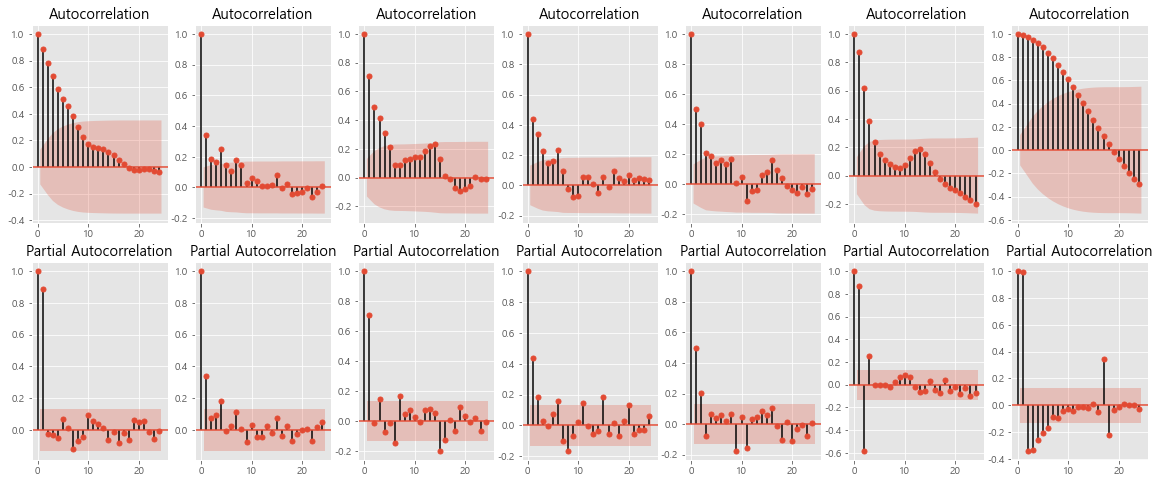

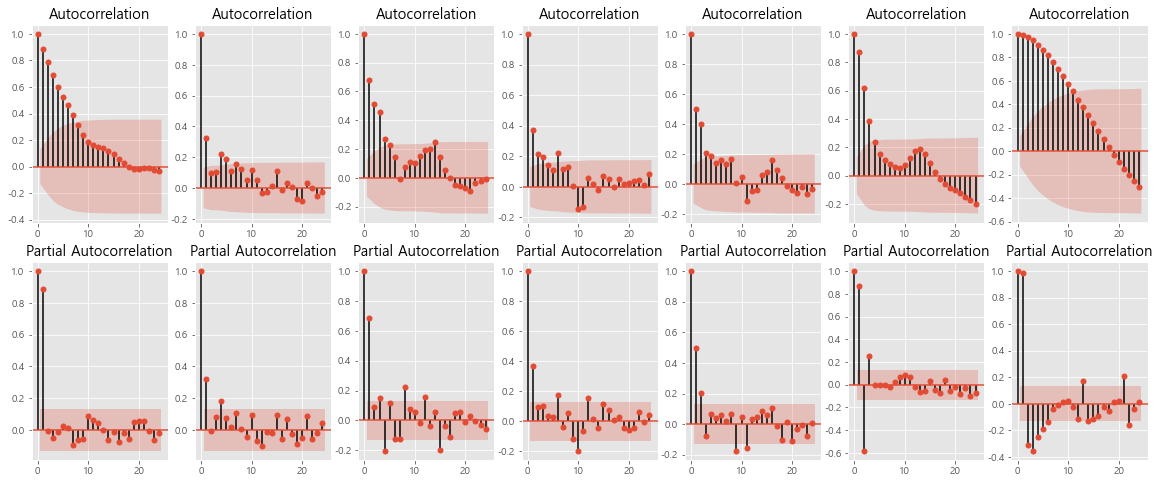

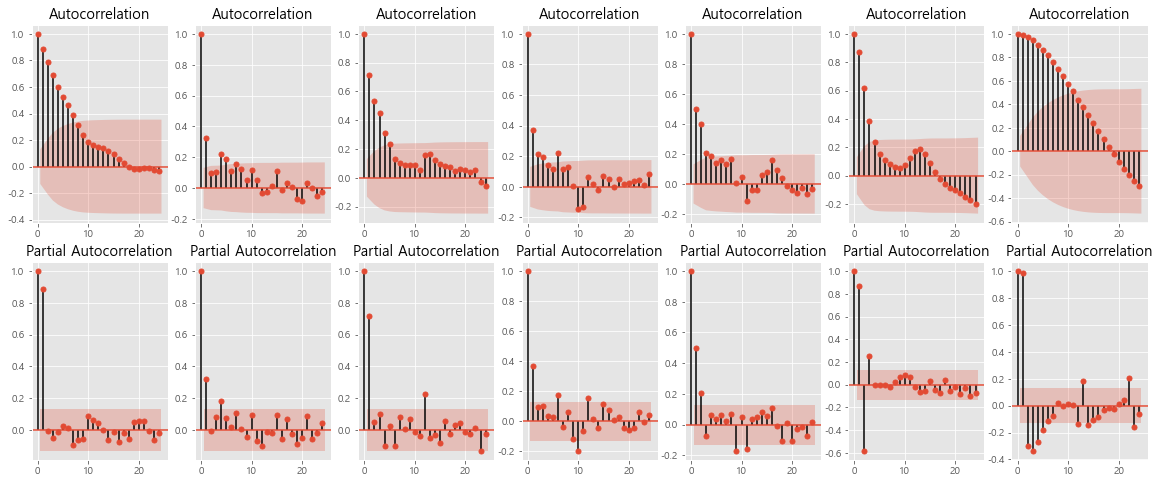

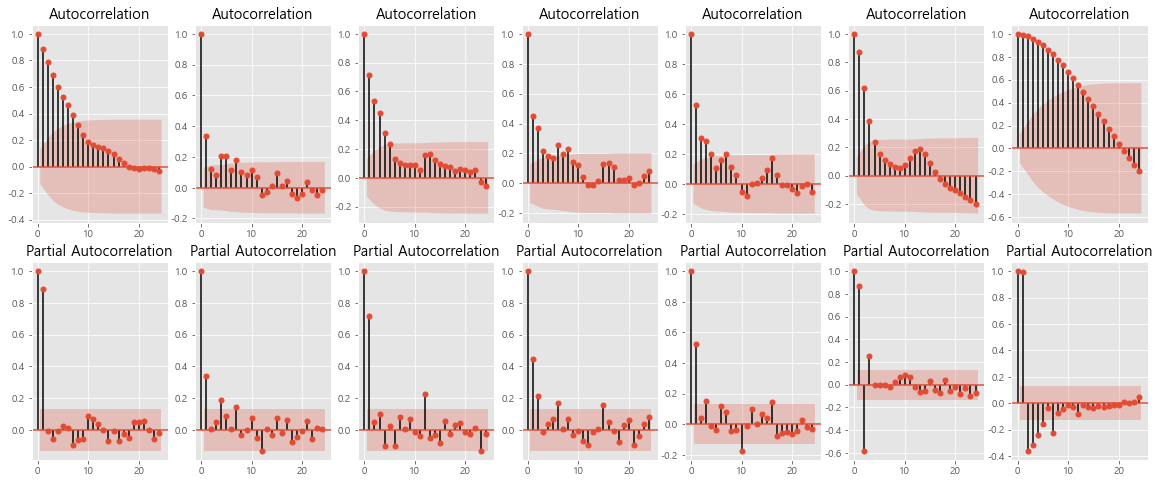

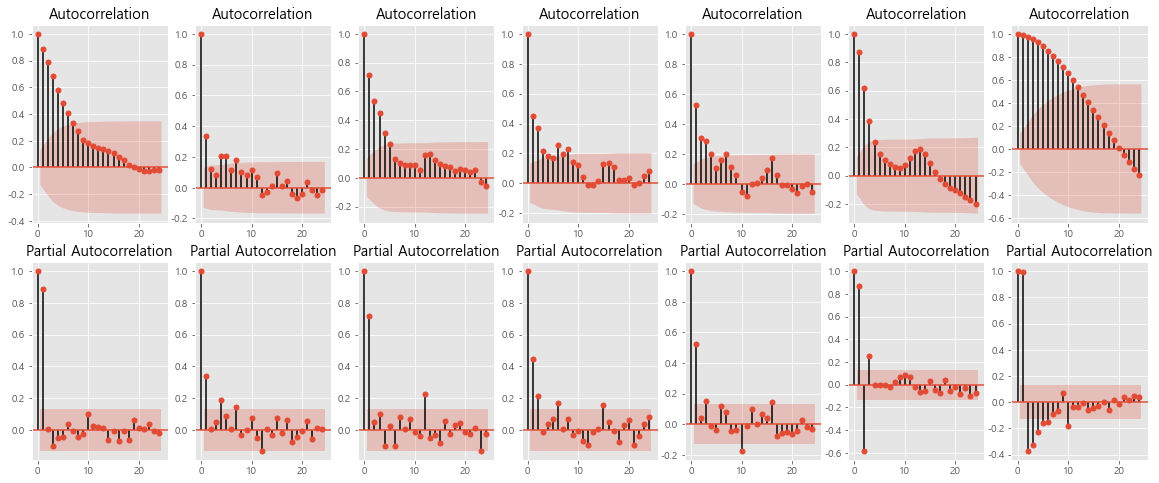

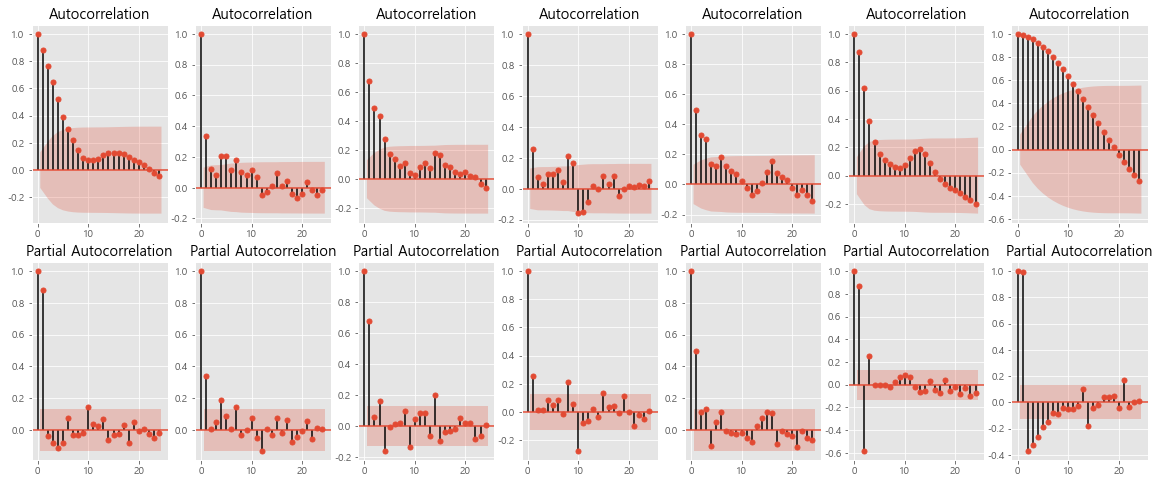

In [10]:
# ACF, PACF를 통하여 적절한 시점 알아보기

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


for j in range(6):
    fig, ax = plt.subplots(2,7,figsize=(20,8))
    for i in range(7): # 홍수사상번호 1, 변수 별 acf, pacf 적용
        group = dataGroup[j][cnts[0]:cnts[1]]
        data = group.iloc[:,i].astype(float)
        data += 0.00001*np.random.rand(data.shape[0])

        # log변환, 차분 적용
        data = np.log1p(data)
        data = data.diff(periods=1).iloc[1:]

        plot_acf(data, ax=ax[0,i])
        plot_pacf(data, method='ywmle', ax=ax[1,i])
plt.show()

In [11]:
display(tmp)

데이터집단 1_유역평균강수  데이터집단 1_강우(A지역)  데이터집단 1_강우(B지역)  데이터집단 1_강우(C지역)  \
0             6.4000                7                7                7   
1             6.3000                7                8                7   
2             6.4000                7                9                7   
3             7.3000                7               10                7   
4             8.2000                7               12                8   
...              ...              ...              ...              ...   
2886         22.7836                6                0                1   
2887          8.2586                2                0                1   
2888          4.1089                1                0                1   
2889          3.3854                1                0                1   
2890          3.2841                1                0                1   

      데이터집단 1_강우(D지역)  데이터집단 1_수위(E지역)  데이터집단 1_수위(D지역)  데이터집단 2_유역평균강수  \
0                   8             2.54        122.56875          6.3000   
1                   8             2.53        122.56250          6.4000   
2                   8             2.53        122.55625          7.3000   
3                   8             2.53        122.55625          8.2000   
4                  10             2.53        122.55625         11.3000   
...               ...              ...              ...             ...   
2886                1             3.03        137.16875          8.2586   
2887                1             3.00        137.18125          4.1089   
2888                1             2.98        137.18750          3.3854   
2889                1             2.96        137.19375          3.2841   
2890                1             2.94        137.20625          2.7514   

      데이터집단 2_강우(A지역)  데이터집단 2_강우(B지역)  ...  데이터 집단 5_강우(D지역)  \
0                   7                7  ...                 8   
1                   7                8  ...                10   
2                   7                9  ...                11   
3                   7               10  ...                14   
4                   9               12  ...                16   
...               ...              ...  ...               ...   
2886                6                0  ...                 1   
2887                2                0  ...                 1   
2888                1                0  ...                 1   
2889                1                0  ...                 1   
2890                1                0  ...                 1   

      데이터 집단 5_수위(E지역)  데이터 집단 5_수위(D지역)  데이터 집단 6_유역평균강수  데이터 집단 6_강우(A지역)  \
0                 2.54           122.660           6.4000                 7   
1                 2.53           122.648           7.3000                 7   
2                 2.53           122.636           8.2000                 7   
3                 2.53           122.620          11.3000                 9   
4                 2.53           122.604          14.4000                12   
...                ...               ...              ...               ...   
2886              3.03           137.088           1.7366                 6   
2887              3.00           137.104           1.7366                 2   
2888              2.98           137.120           1.7366                 1   
2889              2.96           137.136           1.7366                 1   
2890              2.94           137.152           1.7366                 1   

      데이터 집단 6_강우(B지역)  데이터 집단 6_강우(C지역)  데이터 집단 6_강우(D지역)  데이터 집단 6_수위(E지역)  \
0                    7                 8                 8              2.54   
1                    8                10                10              2.53   
2                    9                10                11              2.53   
3                   10                15                14              2.53   
4                   12                18                16              2.

In [12]:
'''홍수사상번호 별로 lagging 적용하기'''
for i in range(1,26):
    floods[i] = tmp[cnts[i-1]:cnts[i]]

In [13]:
for i in range(1,26):
    floods[i] = floods[i].shift(2)

In [14]:
for i in range(1,26):
    floods[i] = floods[i].shift(-1)

In [15]:
for i in range(1,26):
    floods[i] = floods[i].shift(-2)

In [16]:
shifted = pd.concat([floods[1],floods[2]])

In [17]:
for i in range(3,26):
    shifted = pd.concat([shifted,floods[i]])

In [18]:
'''lagging 적용 Dataframe'''
display(shifted)

데이터집단 1_유역평균강수  데이터집단 1_강우(A지역)  데이터집단 1_강우(B지역)  데이터집단 1_강우(C지역)  \
0             6.3000              7.0              8.0              7.0   
1             6.4000              7.0              9.0              7.0   
2             7.3000              7.0             10.0              7.0   
3             8.2000              7.0             12.0              8.0   
4            11.3000              7.0             14.0             10.0   
...              ...              ...              ...              ...   
2886          8.2586              2.0              0.0              1.0   
2887          4.1089              1.0              0.0              1.0   
2888             NaN              NaN              NaN              NaN   
2889             NaN              NaN              NaN              NaN   
2890             NaN              NaN              NaN              NaN   

      데이터집단 1_강우(D지역)  데이터집단 1_수위(E지역)  데이터집단 1_수위(D지역)  데이터집단 2_유역평균강수  \
0                 8.0             2.53        122.56250          6.4000   
1                 8.0             2.53        122.55625          7.3000   
2                 8.0             2.53        122.55625          8.2000   
3                10.0             2.53        122.55625         11.3000   
4                11.0             2.53        122.55625         14.4000   
...               ...              ...              ...             ...   
2886              1.0             3.00        137.18125          4.1089   
2887              1.0             2.98        137.18750          3.3854   
2888              NaN              NaN              NaN             NaN   
2889              NaN              NaN              NaN             NaN   
2890              NaN              NaN              NaN             NaN   

      데이터집단 2_강우(A지역)  데이터집단 2_강우(B지역)  ...  데이터 집단 5_강우(D지역)  \
0                 7.0              8.0  ...              10.0   
1                 7.0              9.0  ...              11.0   
2                 7.0             10.0  ...              14.0   
3                 9.0             12.0  ...              16.0   
4                12.0             14.0  ...              17.0   
...               ...              ...  ...               ...   
2886              2.0              0.0  ...               1.0   
2887              1.0              0.0  ...               1.0   
2888              NaN              NaN  ...               NaN   
2889              NaN              NaN  ...               NaN   
2890              NaN              NaN  ...               NaN   

      데이터 집단 5_수위(E지역)  데이터 집단 5_수위(D지역)  데이터 집단 6_유역평균강수  데이터 집단 6_강우(A지역)  \
0                 2.53           122.648           7.3000               7.0   
1                 2.53           122.636           8.2000               7.0   
2                 2.53           122.620          11.3000               9.0   
3                 2.53           122.604          14.4000              12.0   
4                 2.53           122.592          16.9000              14.0   
...                ...               ...              ...               ...   
2886              3.00           137.104           1.7366               2.0   
2887              2.98           137.120           1.7366               1.0   
2888               NaN               NaN              NaN               NaN   
2889               NaN               NaN              NaN               NaN   
2890               NaN               NaN              NaN               NaN   

      데이터 집단 6_강우(B지역)  데이터 집단 6_강우(C지역)  데이터 집단 6_강우(D지역)  데이터 집단 6_수위(E지역)  \
0                  8.0              10.0              10.0              2.53   
1                  9.0              10.0              11.0              2.53   
2                 10.0              15.0              14.0              2.53   
3                 12.0              18.0              16.0              2.53   
4                 14.0              19.0              17.0              2.

In [19]:
shifted = pd.concat([df2.iloc[:,:6], shifted], axis=1)

In [20]:
shifted.head()  # lagging 적용 완료

홍수사상번호     연  월   일  시간         유입량  데이터집단 1_유역평균강수  데이터집단 1_강우(A지역)  \
0       1  2006  7  10   8  189.100000             6.3              7.0   
1       1  2006  7  10   9  216.951962             6.4              7.0   
2       1  2006  7  10  10  251.424419             7.3              7.0   
3       1  2006  7  10  11  302.812199             8.2              7.0   
4       1  2006  7  10  12  384.783406            11.3              7.0   

   데이터집단 1_강우(B지역)  데이터집단 1_강우(C지역)  ...  데이터 집단 5_강우(D지역)  데이터 집단 5_수위(E지역)  \
0              8.0              7.0  ...              10.0              2.53   
1              9.0              7.0  ...              11.0              2.53   
2             10.0              7.0  ...              14.0              2.53   
3             12.0              8.0  ...              16.0              2.53   
4             14.0             10.0  ...              17.0              2.53   

   데이터 집단 5_수위(D지역)  데이터 집단 6_유역평균강수  데이터 집단 6_강우(A지역)  데이터 집단 6_강우(B지역)  \
0           122.648              7.3               7.0               8.0   
1           122.636              8.2               7.0               9.0   
2           122.620             11.3               9.0              10.0   
3           122.604             14.4              12.0              12.0   
4           122.592             16.9              14.0              14.0   

   데이터 집단 6_강우(C지역)  데이터 집단 6_강우(D지역)  데이터 집단 6_수위(E지역)  데이터 집단 6_수위(D지역)  
0              10.0              10.0              2.53           122.600  
1              10.0              11.0              2.53           122.590  
2              15.0              14.0              2.53           122.585  
3              18.0              16.0              2.53           122.575  
4              19.0              17.0              2.53           122.565  

[5 rows x 48 columns]

In [21]:
shifted.iloc[[225,226,227]]

홍수사상번호     연  월   일  시간          유입량  데이터집단 1_유역평균강수  데이터집단 1_강우(A지역)  \
225       1  2006  7  19  17  3285.961383             NaN              NaN   
226       2  2006  7  25  24   323.993267             0.0              0.0   
227       2  2006  7  26   1   323.154138             0.5              0.0   

     데이터집단 1_강우(B지역)  데이터집단 1_강우(C지역)  ...  데이터 집단 5_강우(D지역)  \
225              NaN              NaN  ...               NaN   
226              2.0              0.0  ...               1.0   
227              2.0              0.0  ...               2.0   

     데이터 집단 5_수위(E지역)  데이터 집단 5_수위(D지역)  데이터 집단 6_유역평균강수  데이터 집단 6_강우(A지역)  \
225               NaN               NaN              NaN               NaN   
226              2.91            134.48              1.5               1.0   
227              2.90            134.46              2.6               2.0   

     데이터 집단 6_강우(B지역)  데이터 집단 6_강우(C지역)  데이터 집단 6_강우(D지역)  데이터 집단 6_수위(E지역)  \
225               NaN               NaN               NaN               NaN   
226               2.0               2.0               1.0              2.91   
227               2.0               3.0               2.0              2.90   

     데이터 집단 6_수위(D지역)  
225               NaN  
226            134.46  
227            134.44  

[3 rows x 48 columns]

In [22]:
# 데이터집단 별로 그룹 나누기

dataGroup2 = [shifted.iloc[:,i:i+7] for i in range(6,48,7)]

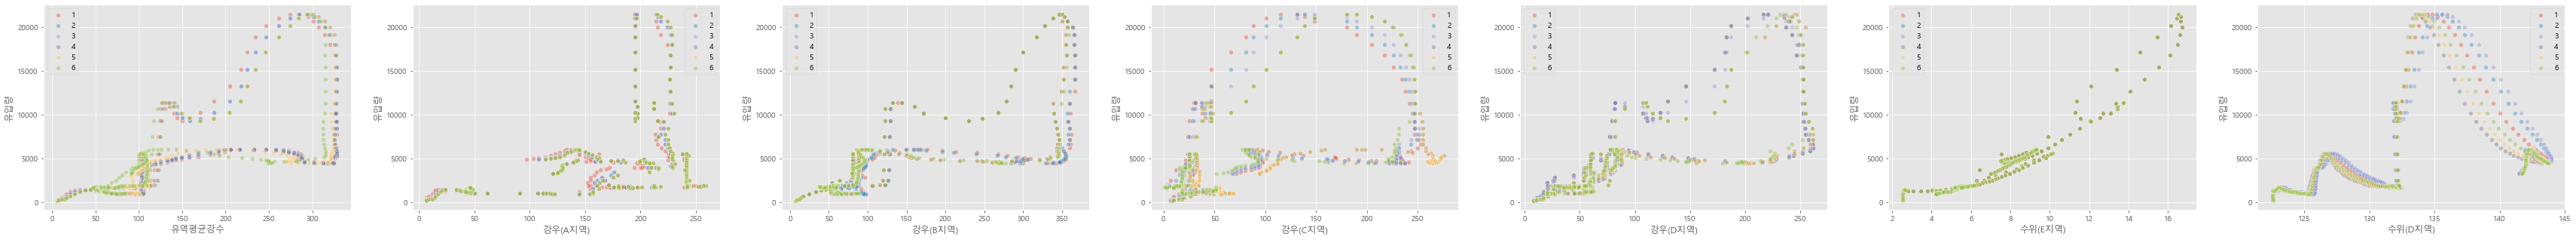

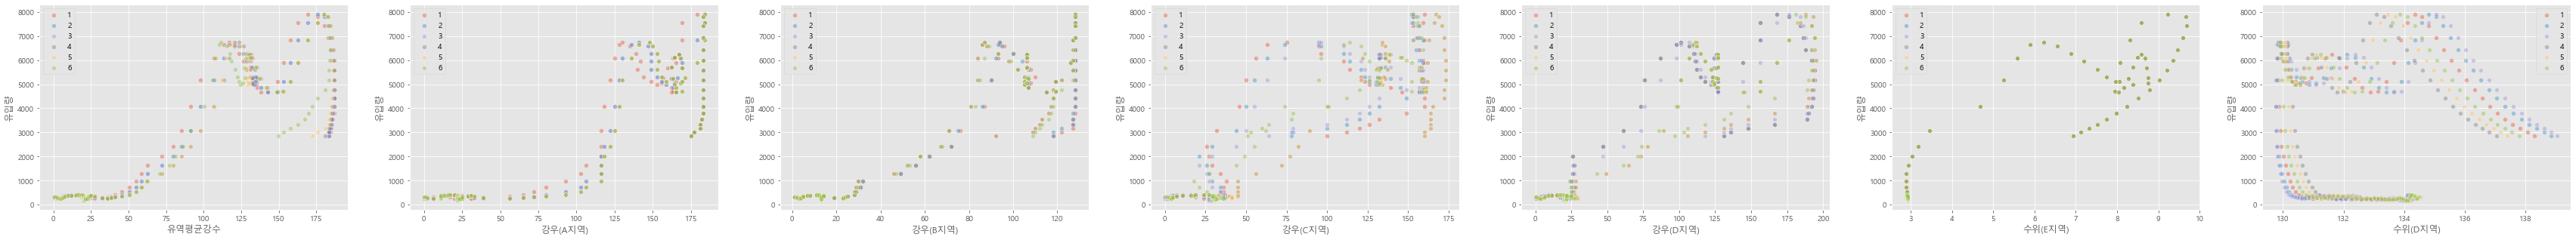

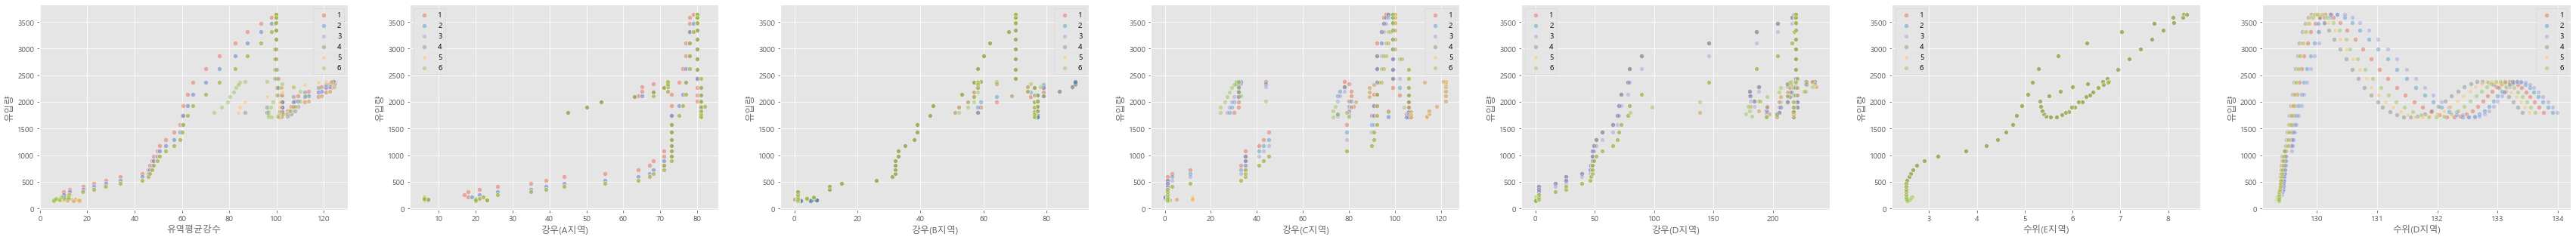

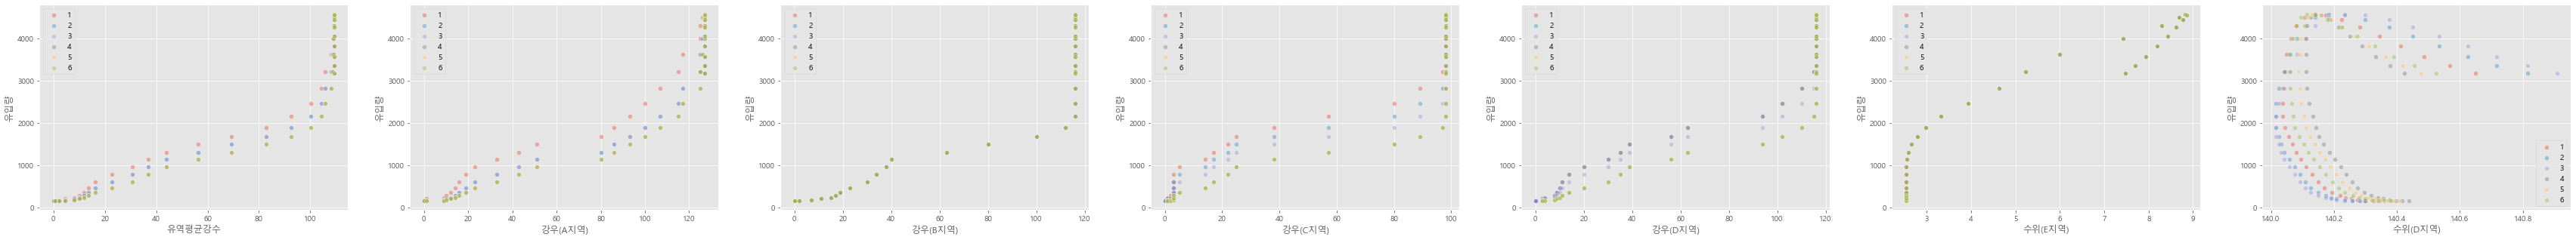

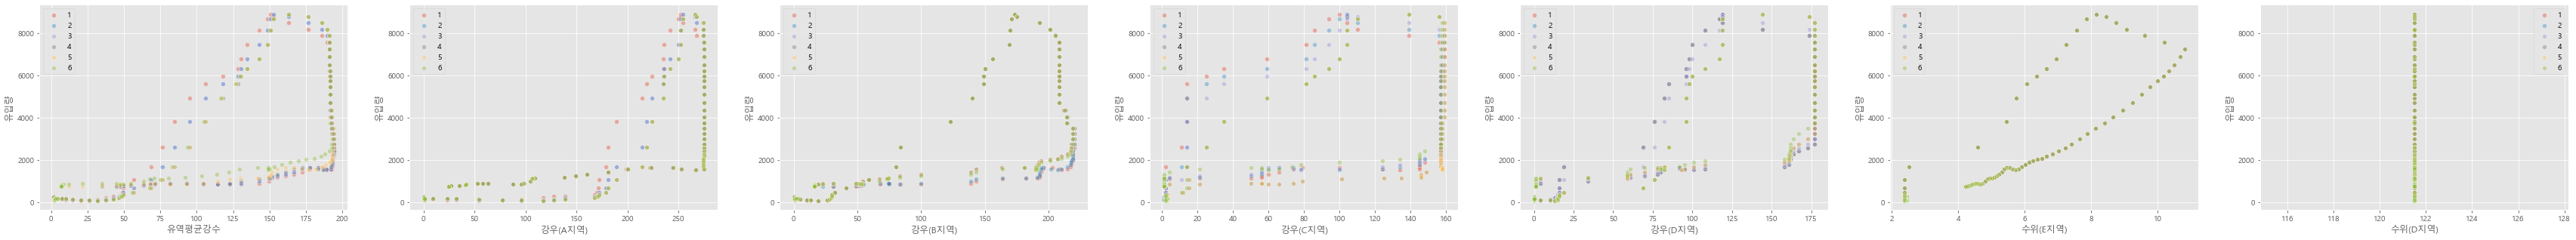

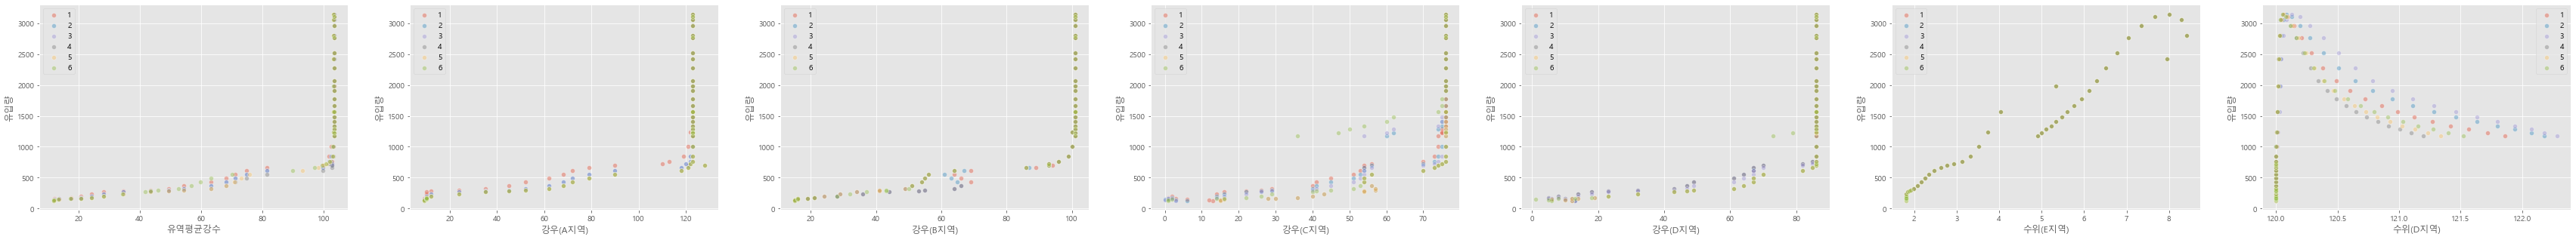

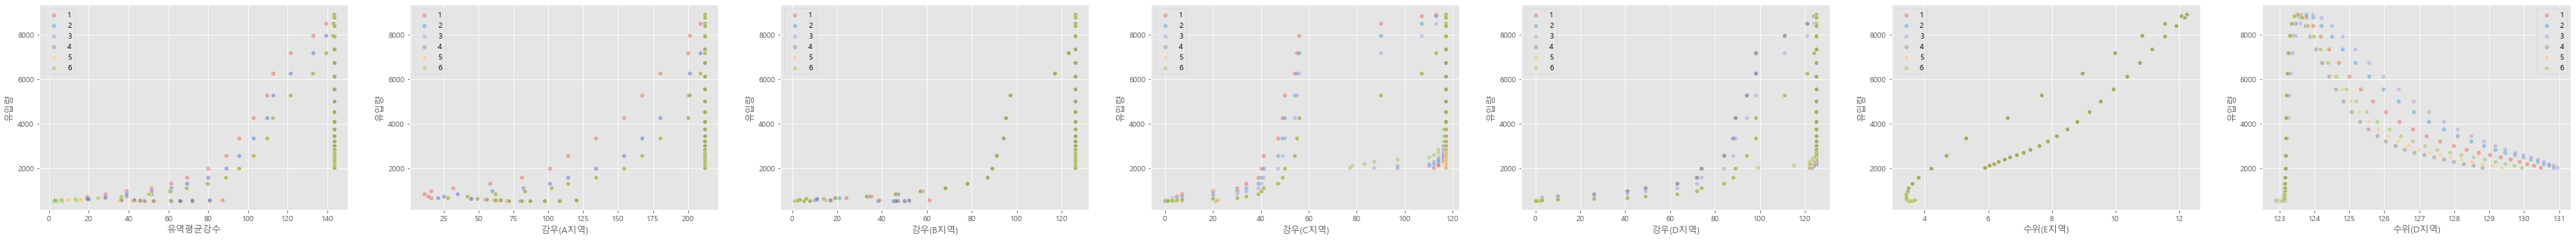

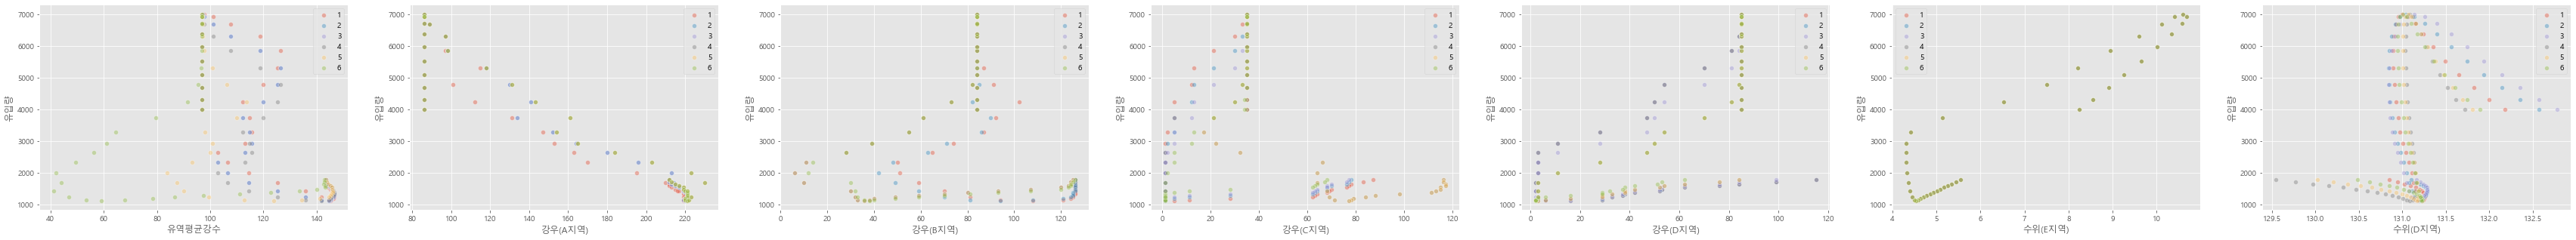

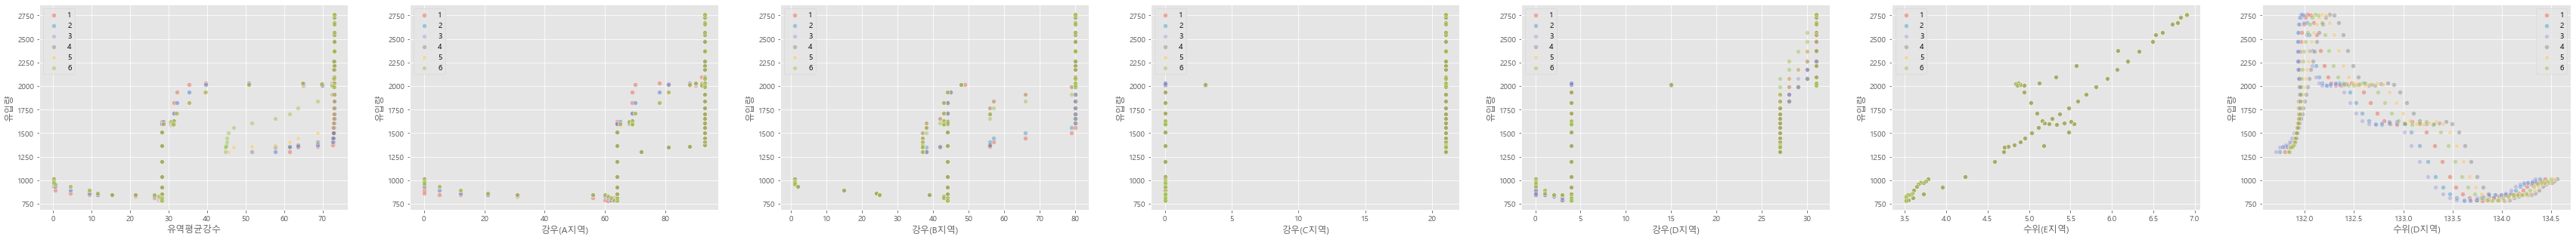

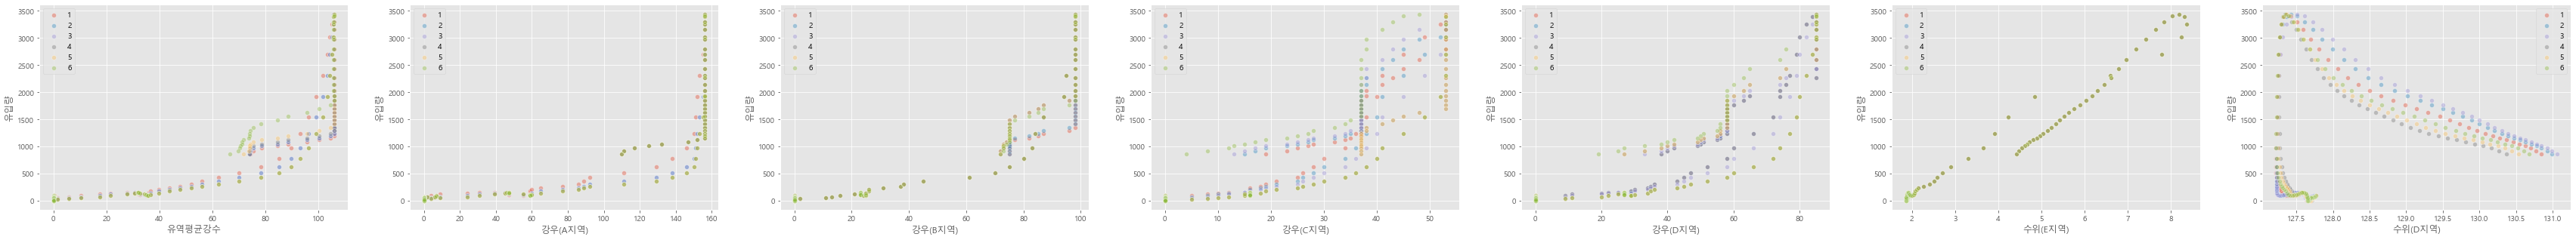

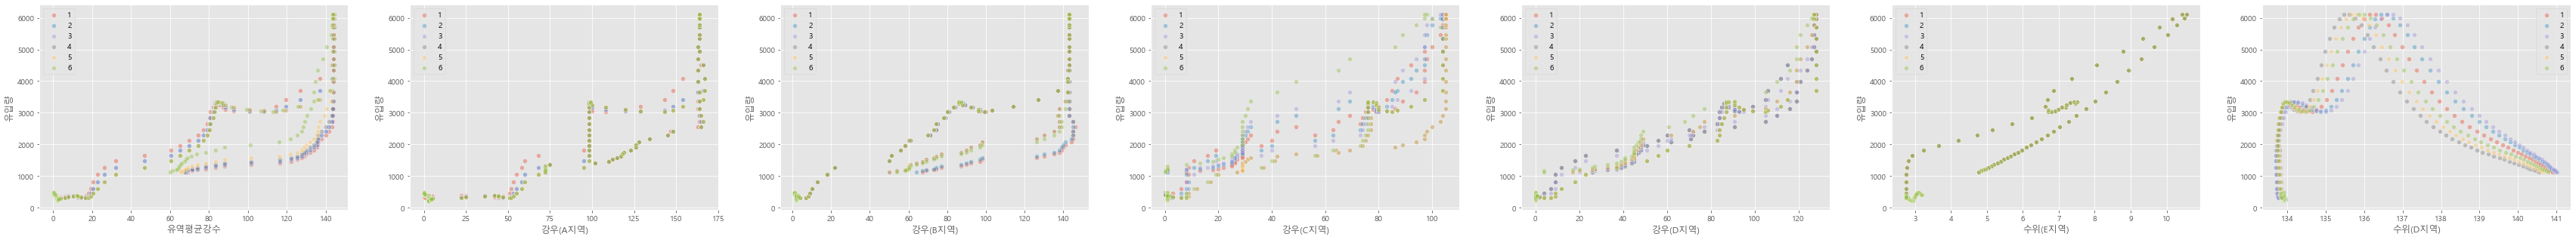

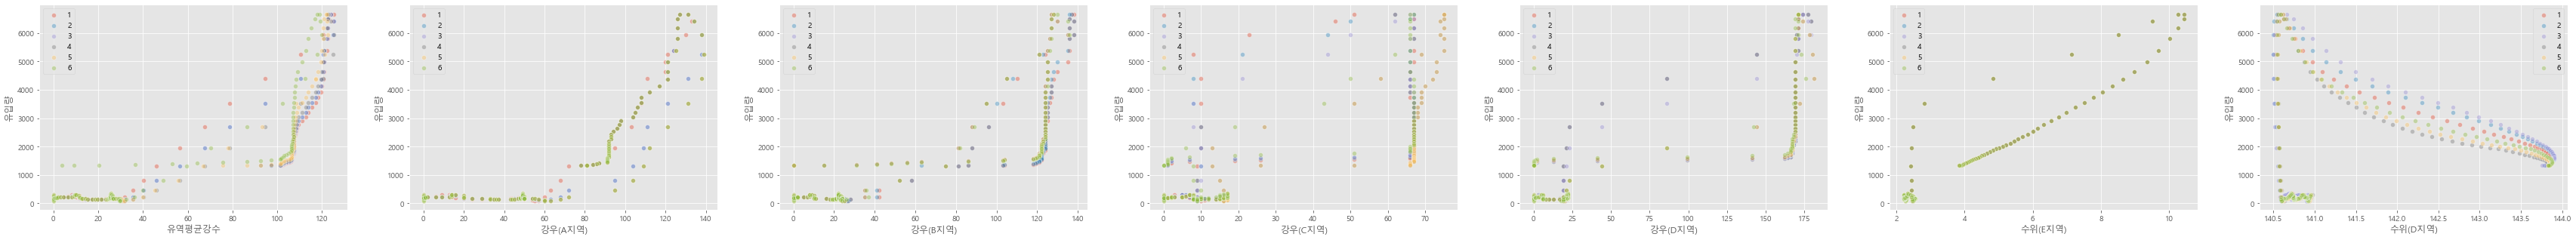

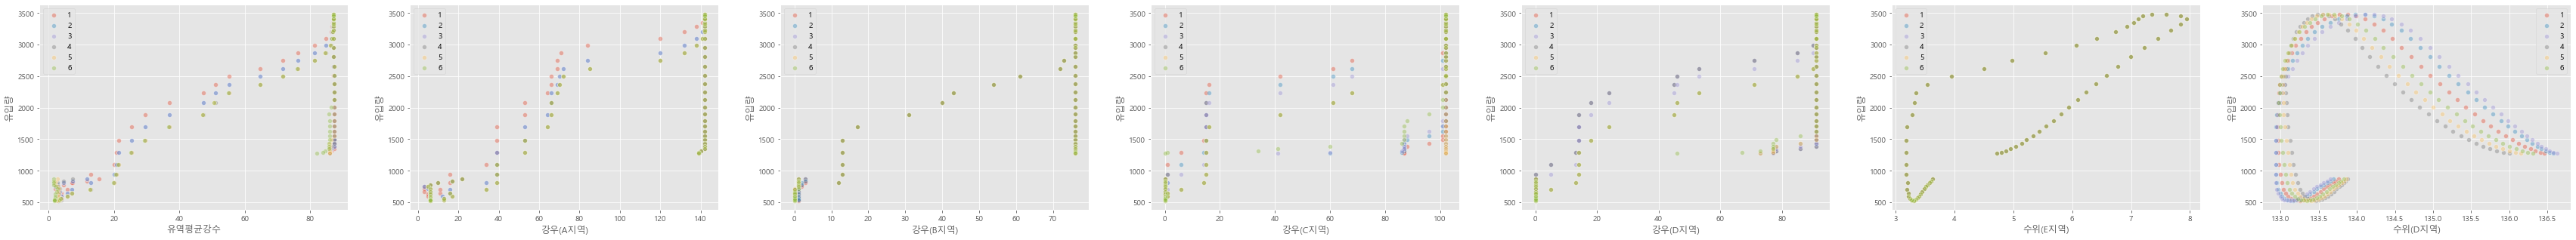

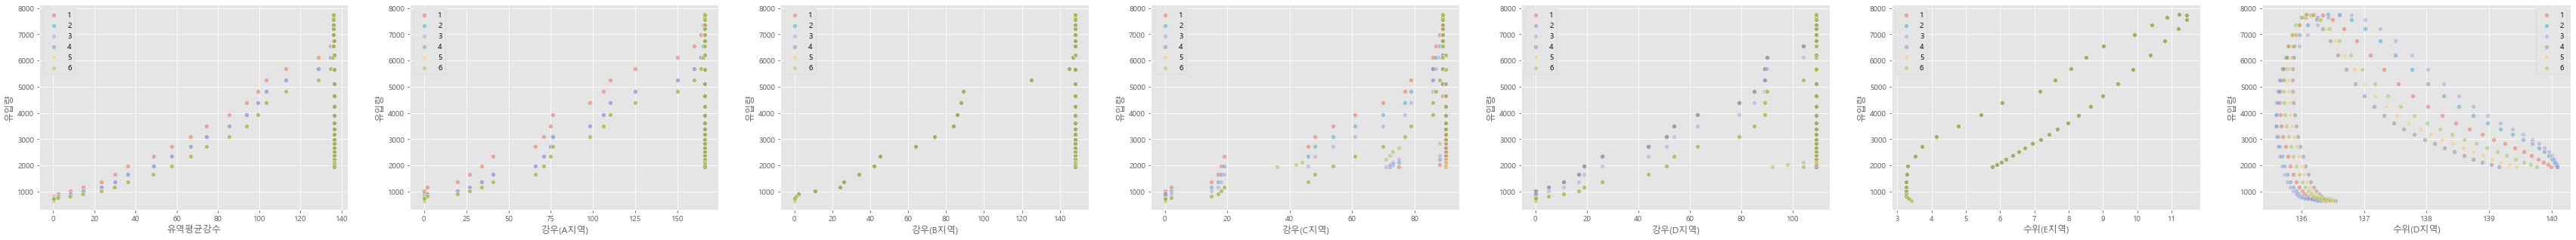

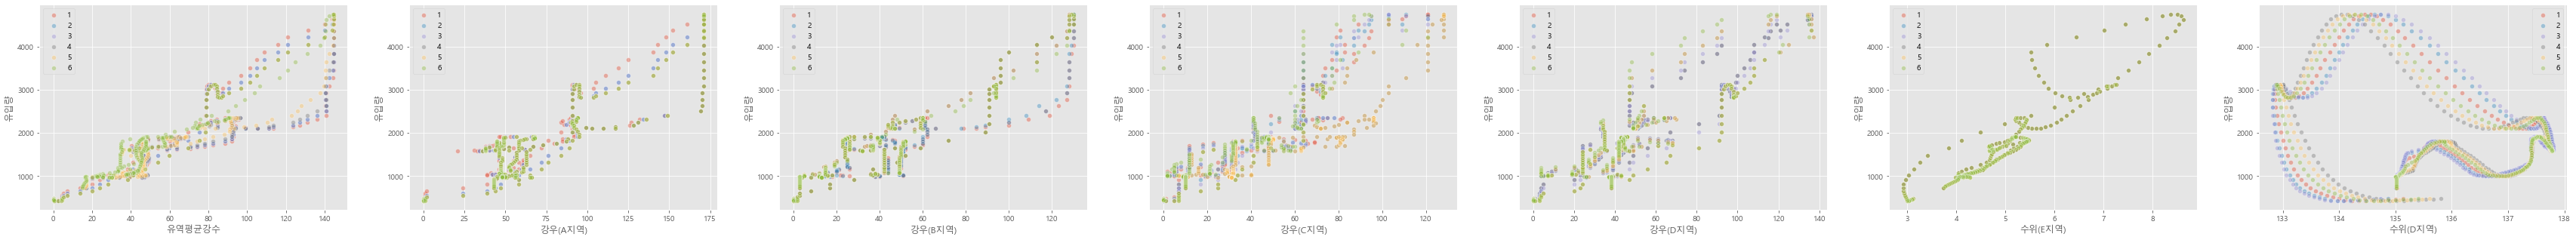

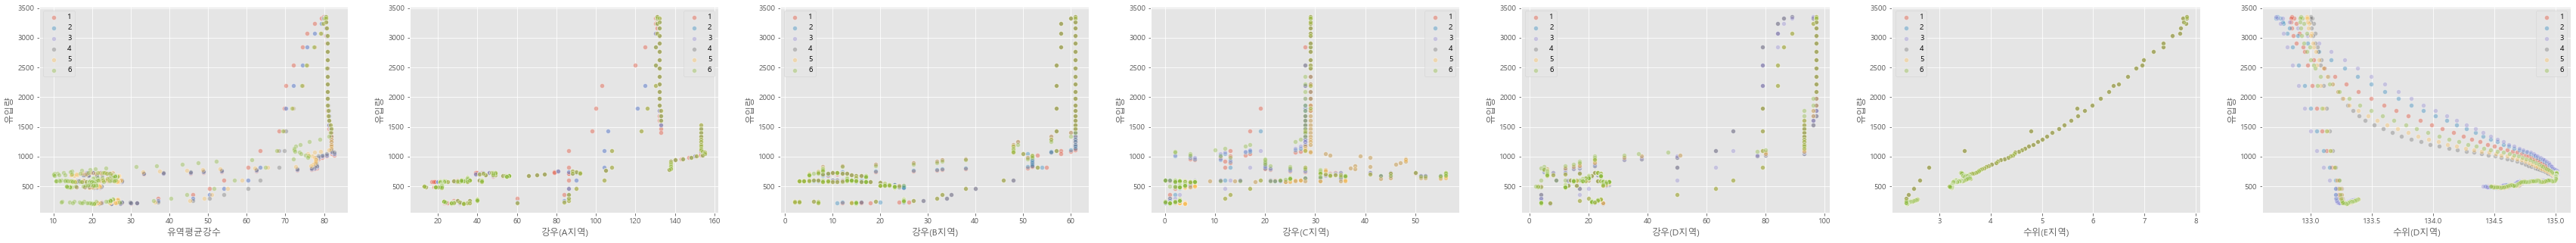

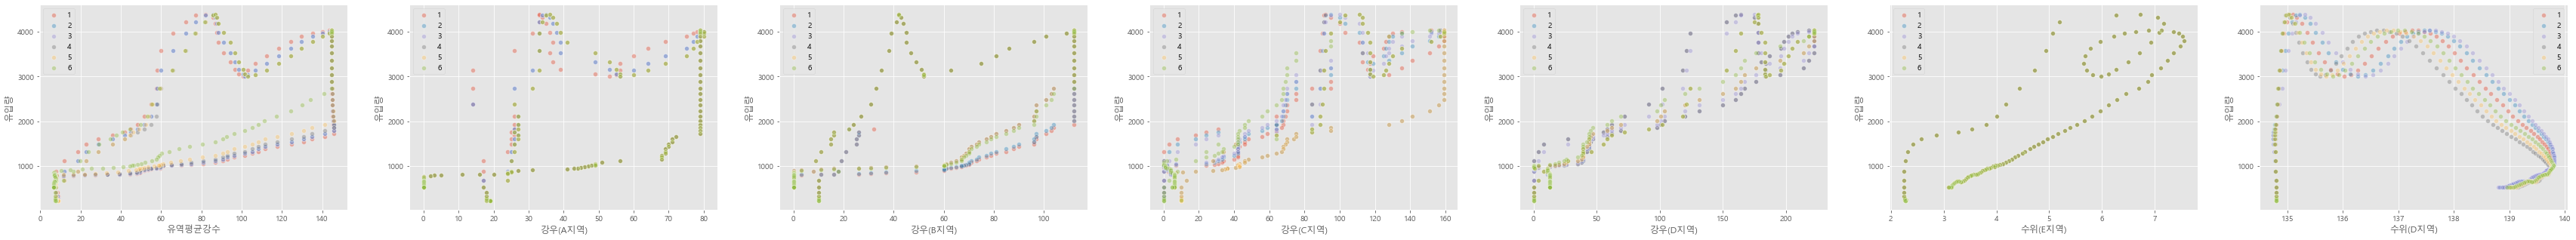

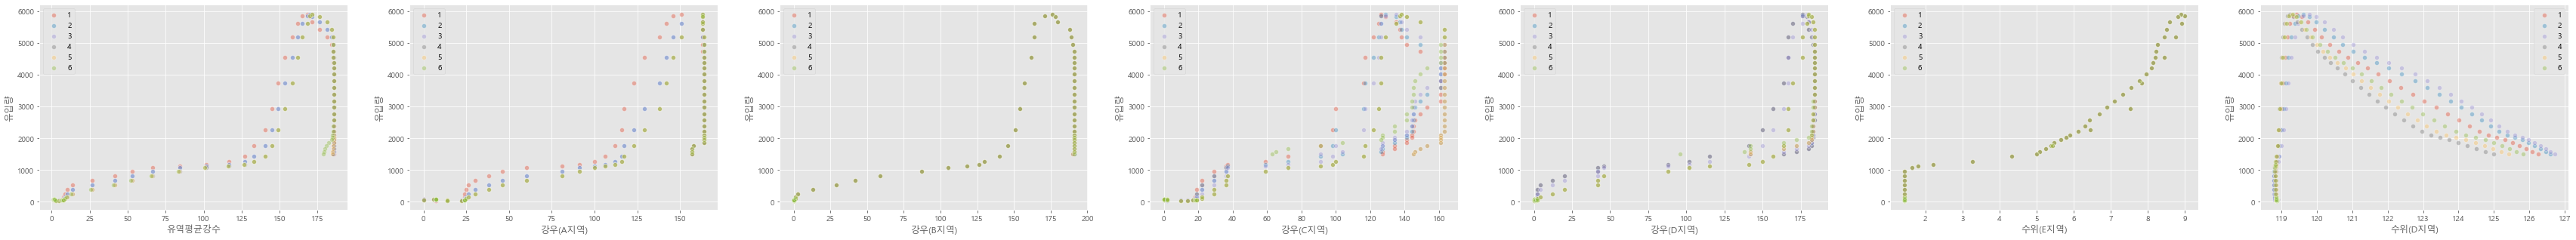

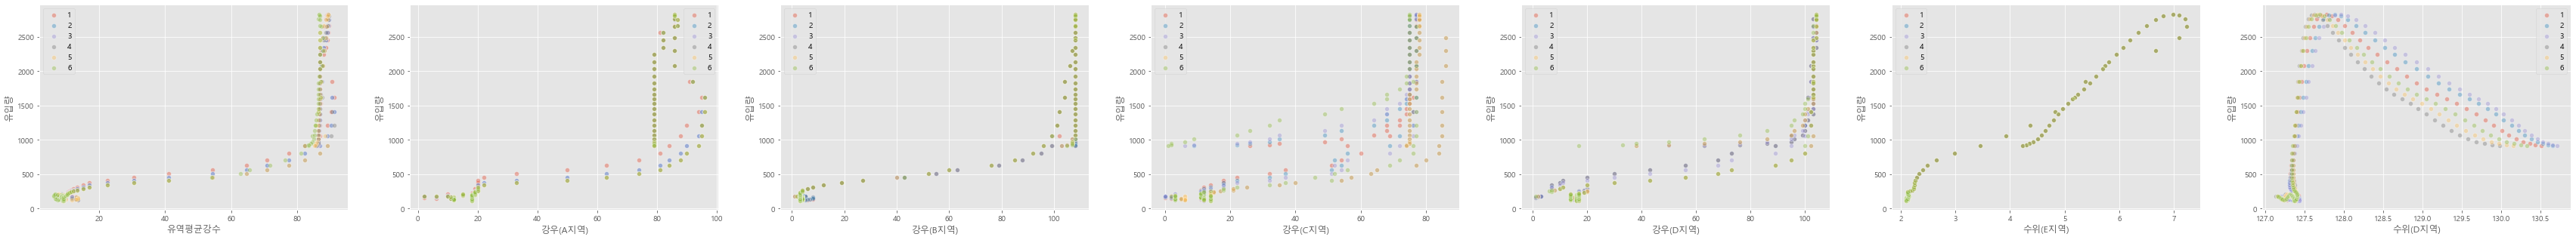

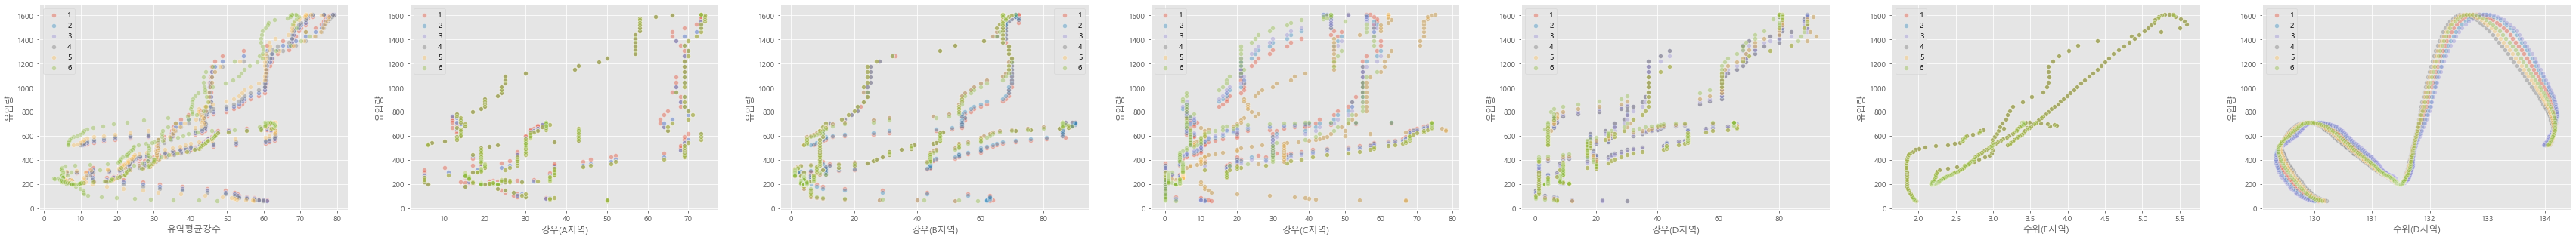

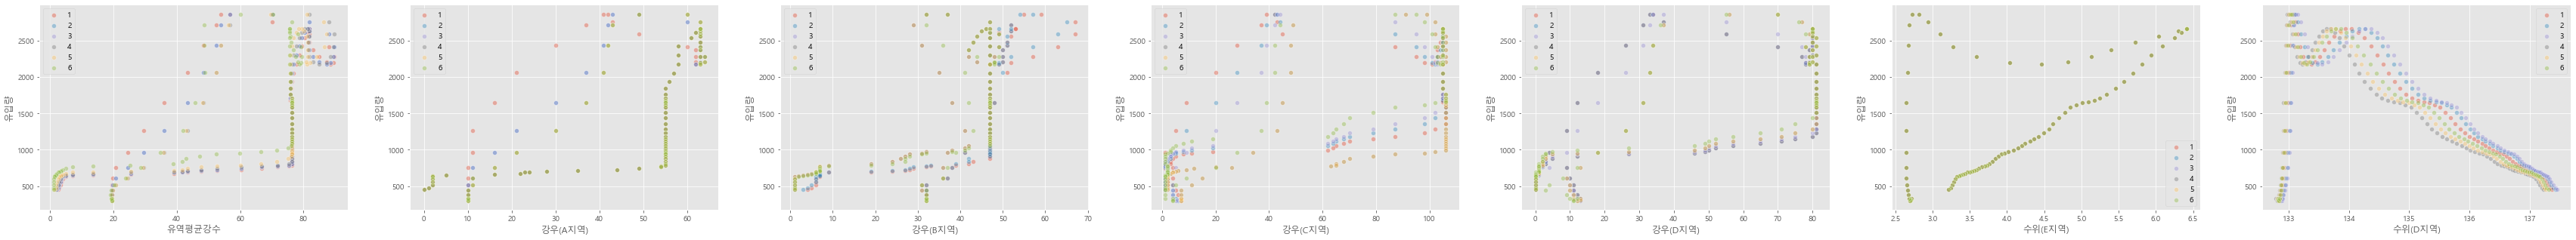

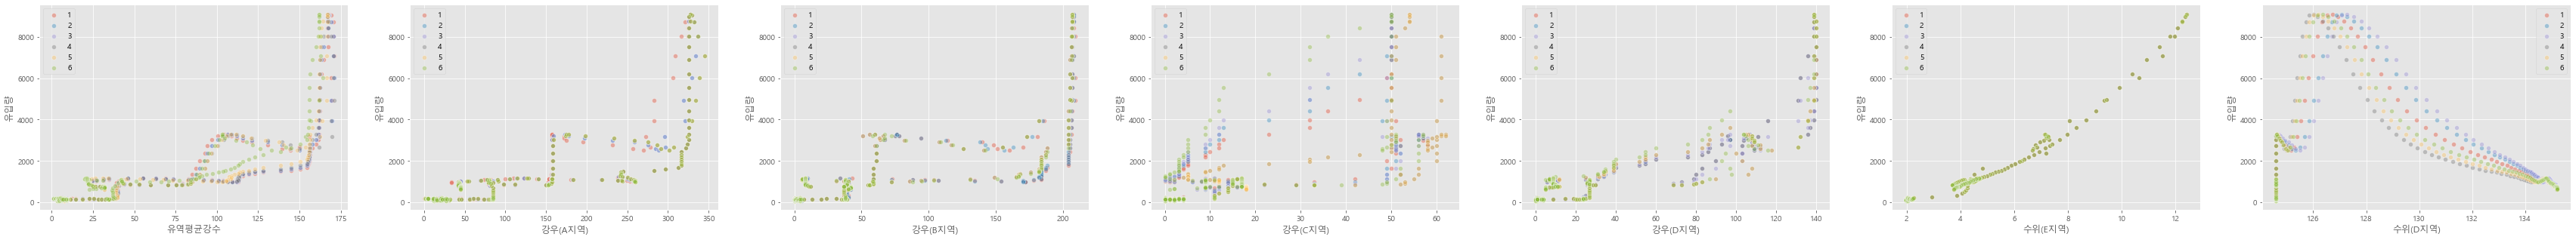

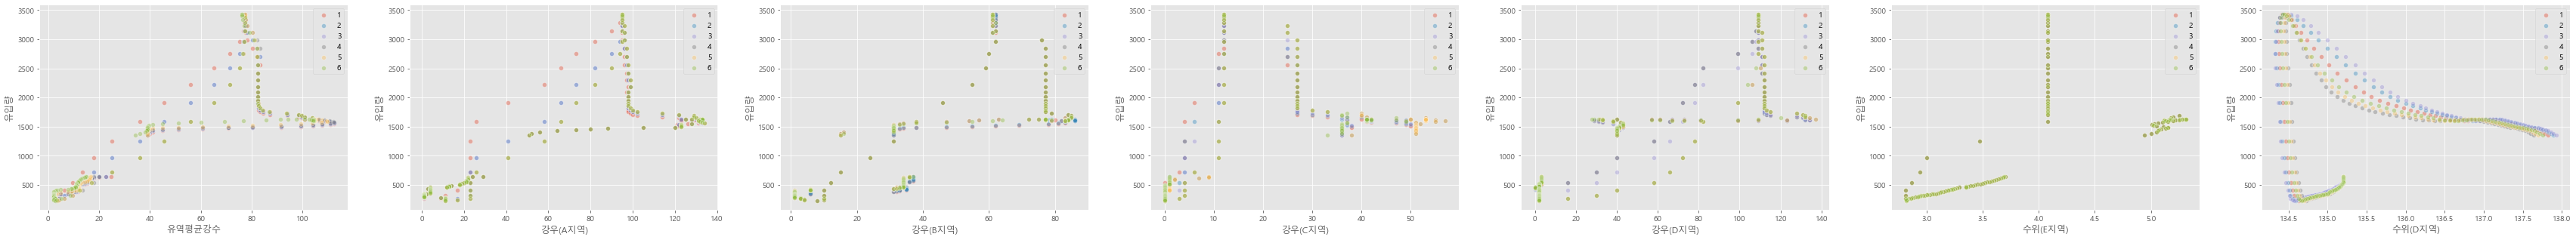

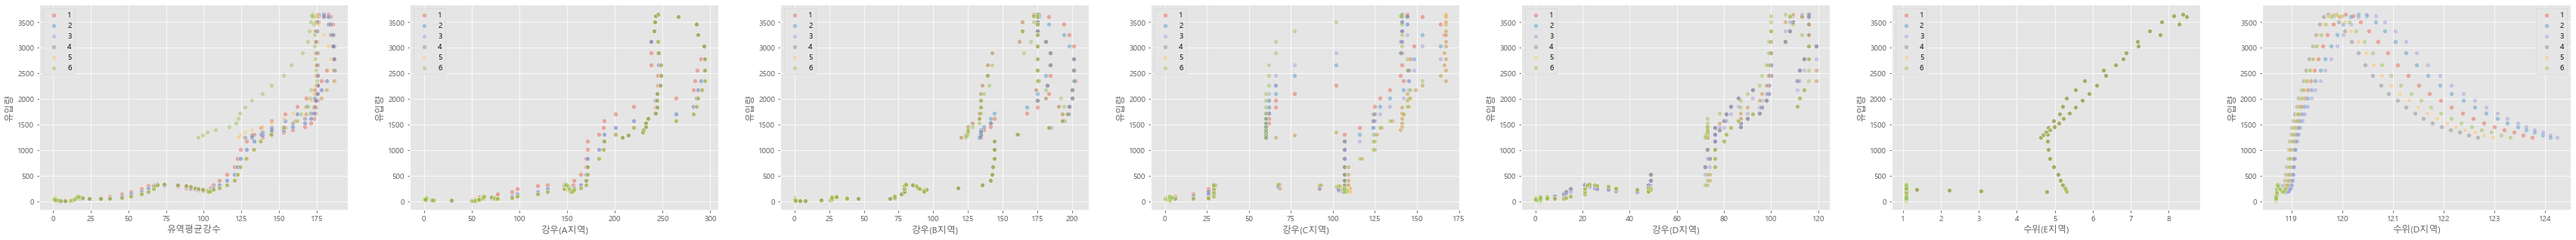

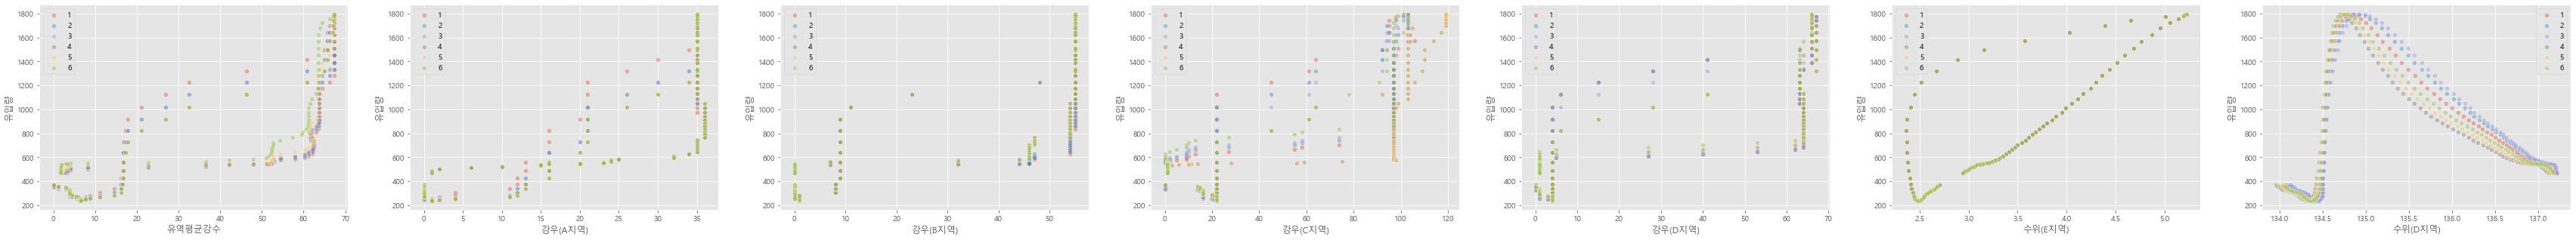

In [23]:
# 각 행이 홍수사상번호 순, 각 열이 변수 순, lagging 적용

for k in range(1,26):
    figure, axes = plt.subplots(1,7,figsize=(60,5))
    for i in range(7):
        for j in range(6):
            temp = dataGroup[j][cnts[k-1]:cnts[k]]
            sns.scatterplot(x=temp.iloc[:,i], y=df['유입량'][cnts[k-1]:cnts[k]], alpha=0.4,
                            label=j+1, ax=axes[i])
        axes[i].set_xlabel(dataGroup2[0].columns[i].split('_')[1])
        axes[i].legend()
        axes[i].set_ylabel("유입량")
plt.show()

In [24]:
res = []
for i in range(1,26):
    row = np.zeros(7)
    for k in range(6,13):
        tmp = np.zeros(6)
        for j in range(6):
            corrDf = pd.concat([shifted.iloc[cnts[i-1]:cnts[i],5],shifted.iloc[cnts[i-1]:cnts[i],k+7*j]], axis=1)
            tmp[j] = corrDf.corr().iloc[1,0]
        avg_corr = tmp.sum()/6
        row[k-6] = avg_corr
    res.append(row)

res = np.array(res)
corr_df_lag = pd.DataFrame(res, index=list(range(1,26)), 
                       columns = ['유역평균강수', '강우(A지역)', '강우(B지역)', 
                                  '강우(C지역)', '강우(D지역)', '수위(E지역)', '수위(D지역)'])

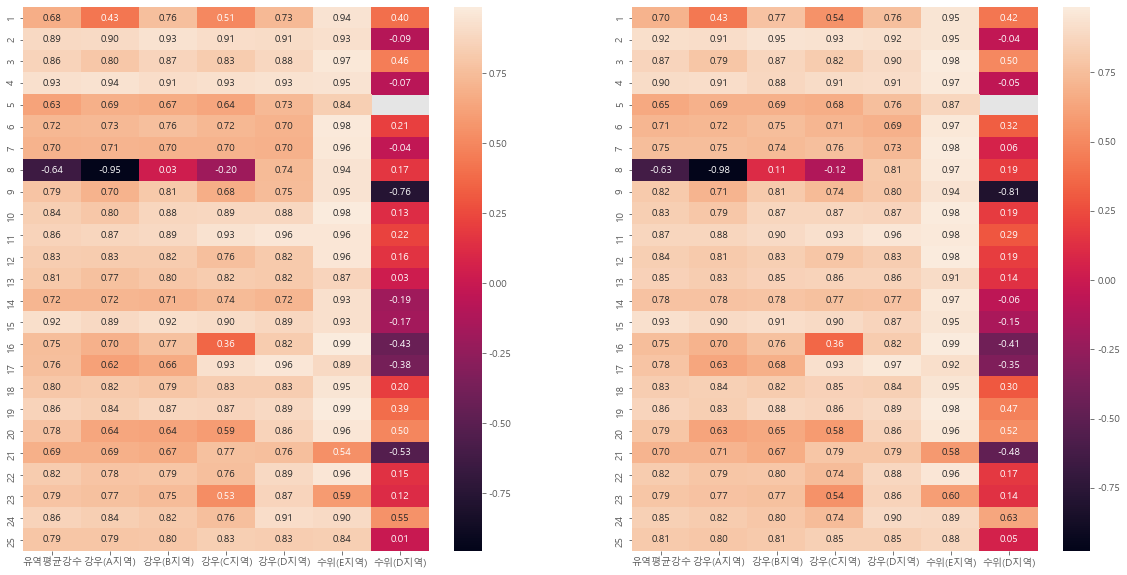

In [25]:
# 왼쪽 lagging X, 오른쪽 lagging
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.heatmap(corr_df,annot=True, fmt='0.2f', ax=ax[0])
sns.heatmap(corr_df_lag,annot=True, fmt='0.2f', ax=ax[1])
plt.show()

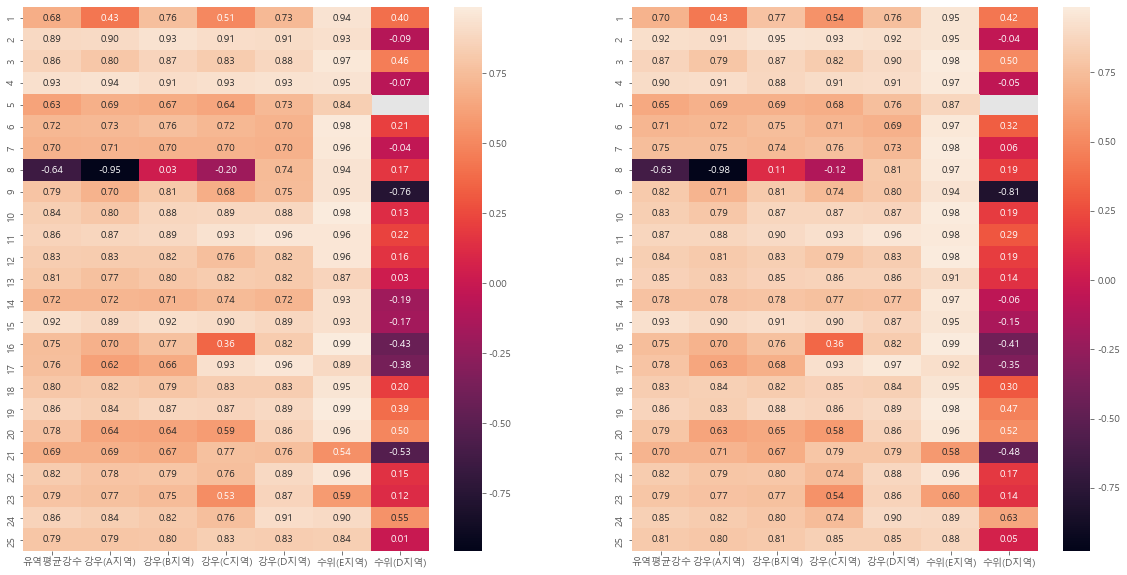

In [26]:
# lagging (-1)
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.heatmap(corr_df,annot=True, fmt='0.2f', ax=ax[0])
sns.heatmap(corr_df_lag,annot=True, fmt='0.2f', ax=ax[1])
plt.show()

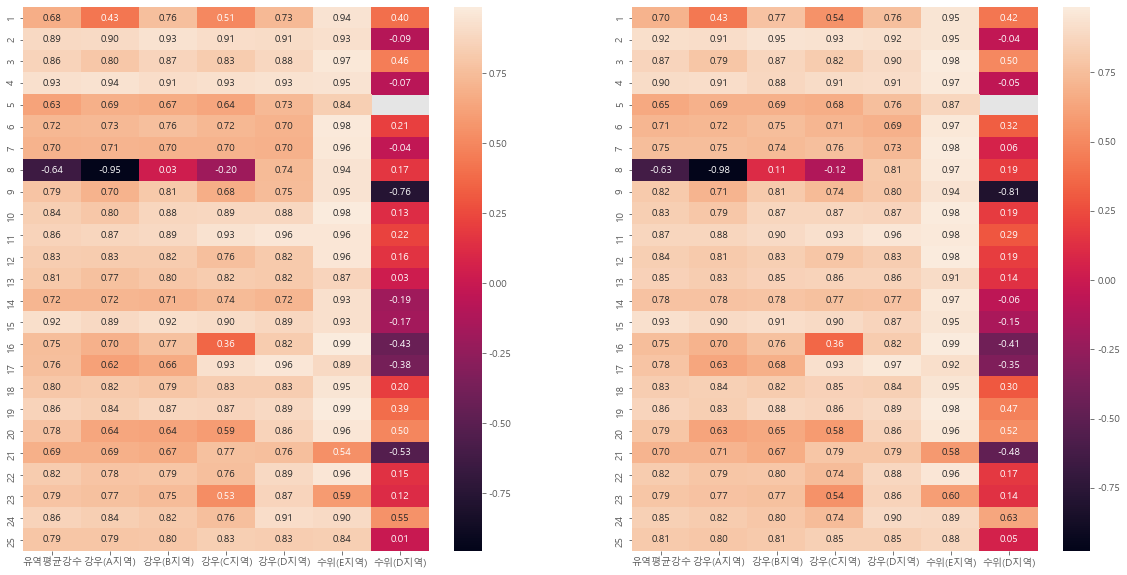

In [27]:
# 왼쪽 lagging X, 오른쪽 lagging(-2)
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.heatmap(corr_df,annot=True, fmt='0.2f', ax=ax[0])
sns.heatmap(corr_df_lag,annot=True, fmt='0.2f', ax=ax[1])
plt.show()

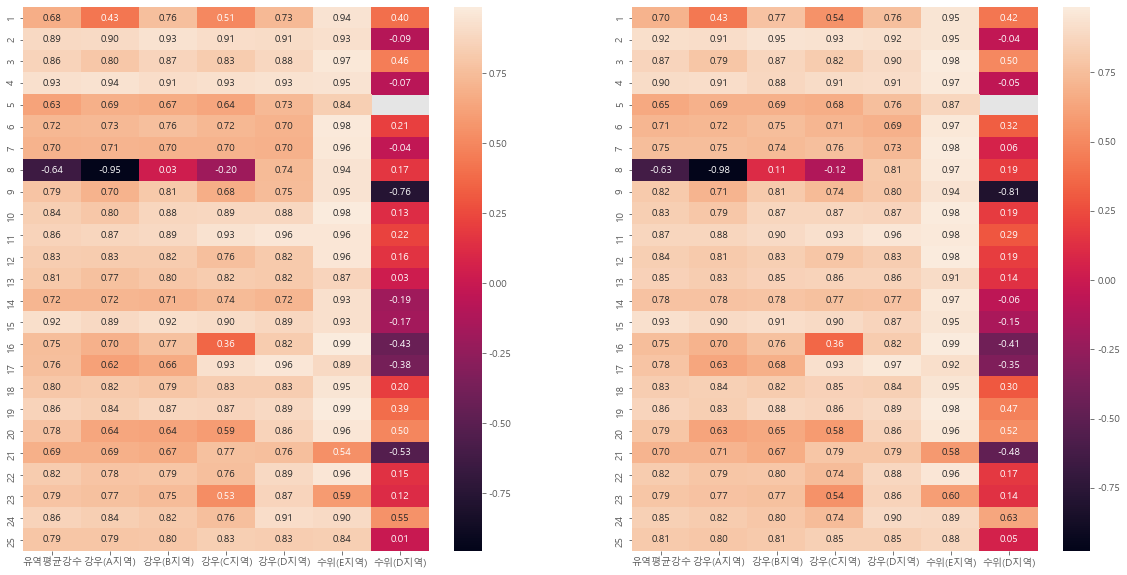

In [28]:
# 왼쪽 lagging X, 오른쪽 lagging(-3)
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.heatmap(corr_df,annot=True, fmt='0.2f', ax=ax[0])
sns.heatmap(corr_df_lag,annot=True, fmt='0.2f', ax=ax[1])
plt.show()

<br>
<hr>
<br>

## 2. X^2 적용

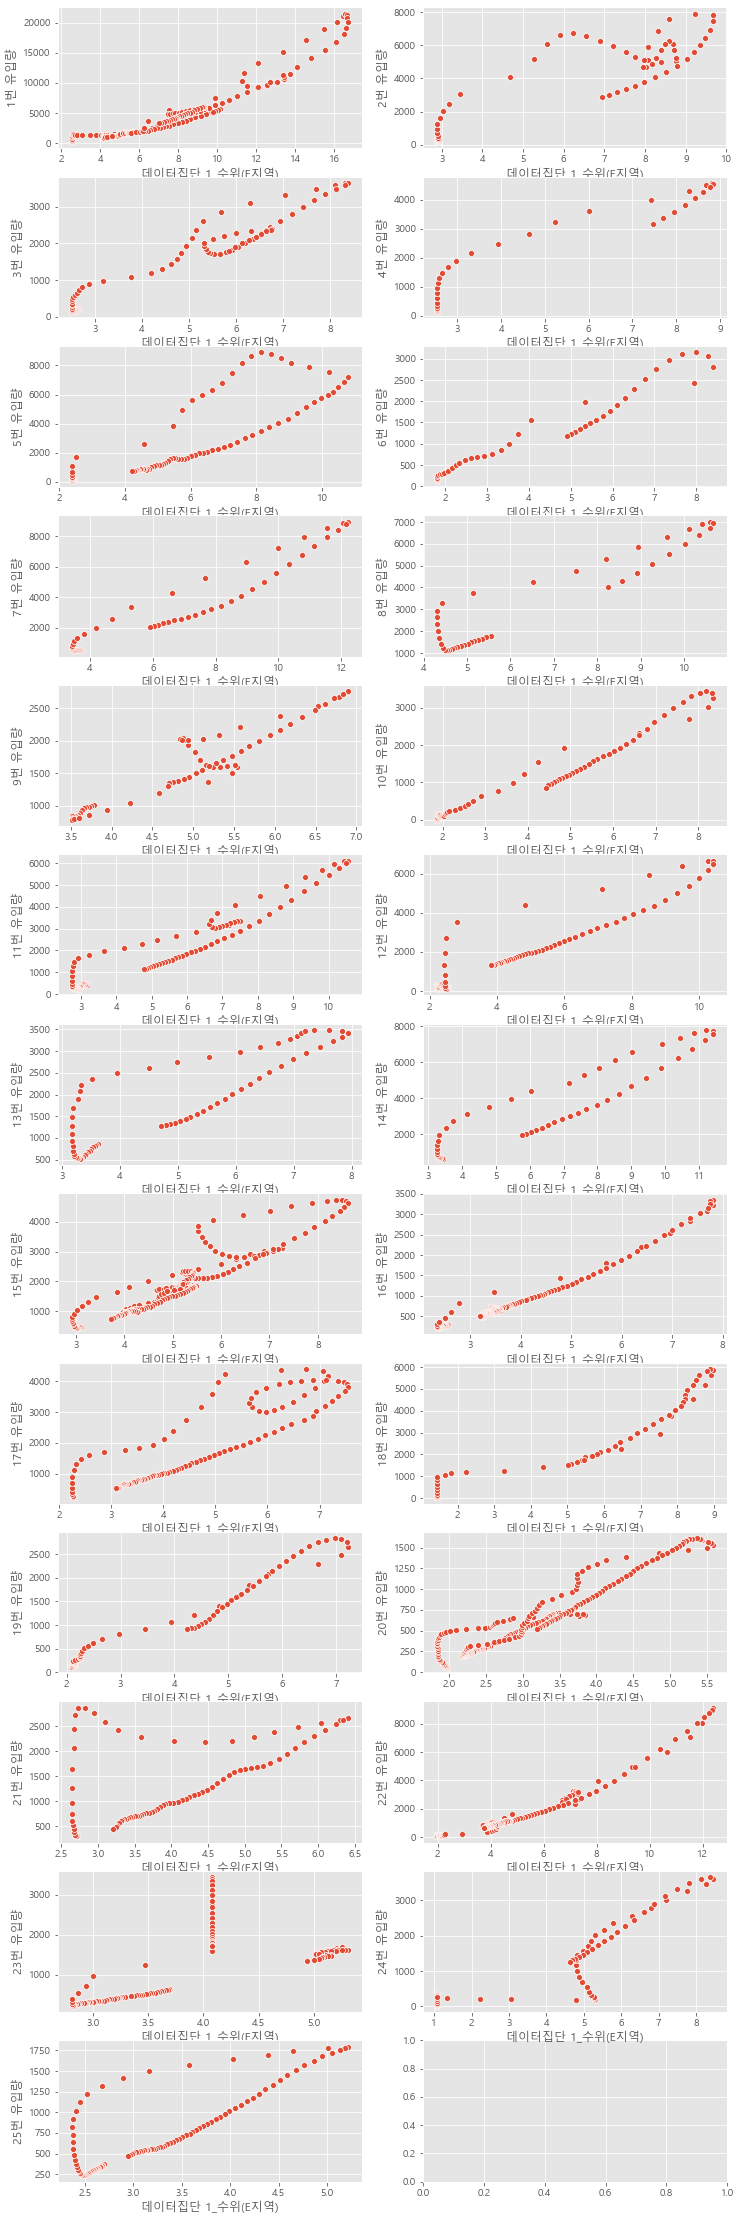

In [29]:
fig,ax = plt.subplots(13,2,figsize=(12,40))
for i in df.홍수사상번호.unique():
    plt.subplot(13,2,i)
    sns.scatterplot("데이터집단 1_수위(E지역)", "유입량", data=df[cnts[i-1]:cnts[i]])
    plt.ylabel(str(i)+"번 유입량")

### Transformation for Nonlinearity only

### X' = X^2 (shifted(-1))
#### 제일 선형 관계를 가지나, y값이 좀 넓게 퍼지는 경향

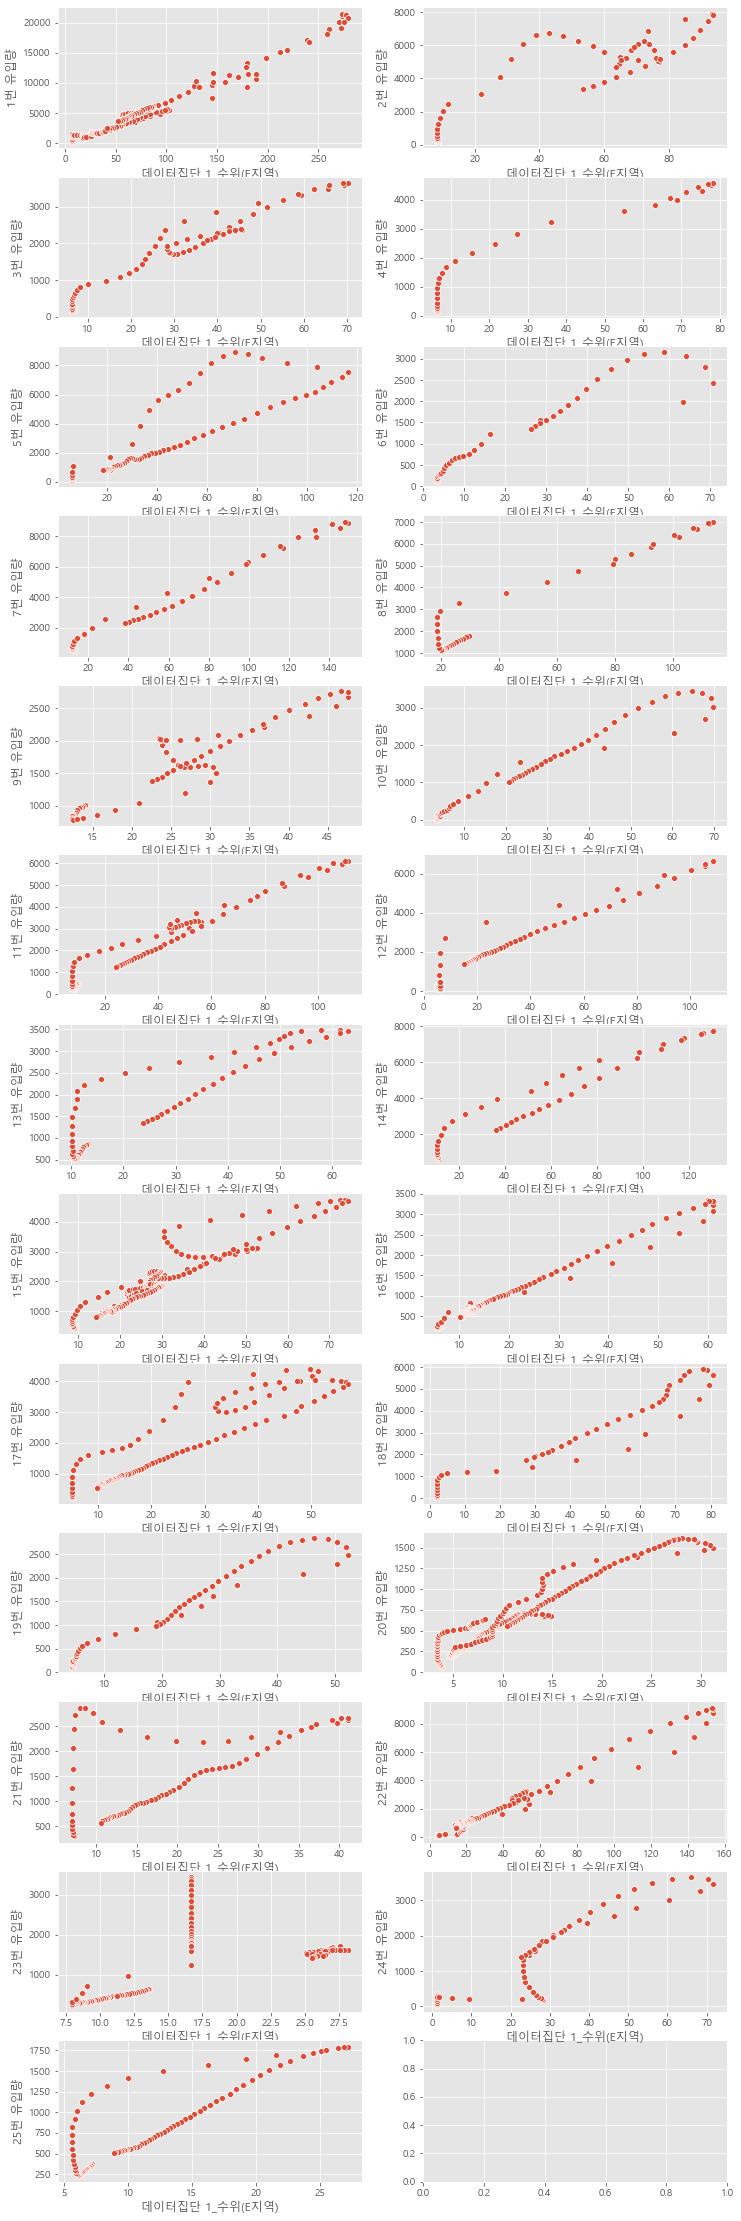

In [30]:
sq_x = shifted["데이터집단 1_수위(E지역)"] ** 2
fig,ax = plt.subplots(13,2,figsize=(12,40))
for i in df.홍수사상번호.unique():
    plt.subplot(13,2,i)
    sns.scatterplot(sq_x[cnts[i-1]:cnts[i]], shifted['유입량'][cnts[i-1]:cnts[i]])
    plt.ylabel(str(i)+"번 유입량")

### X' = X^2

In [31]:
sq_x.max()

279.55839999999995

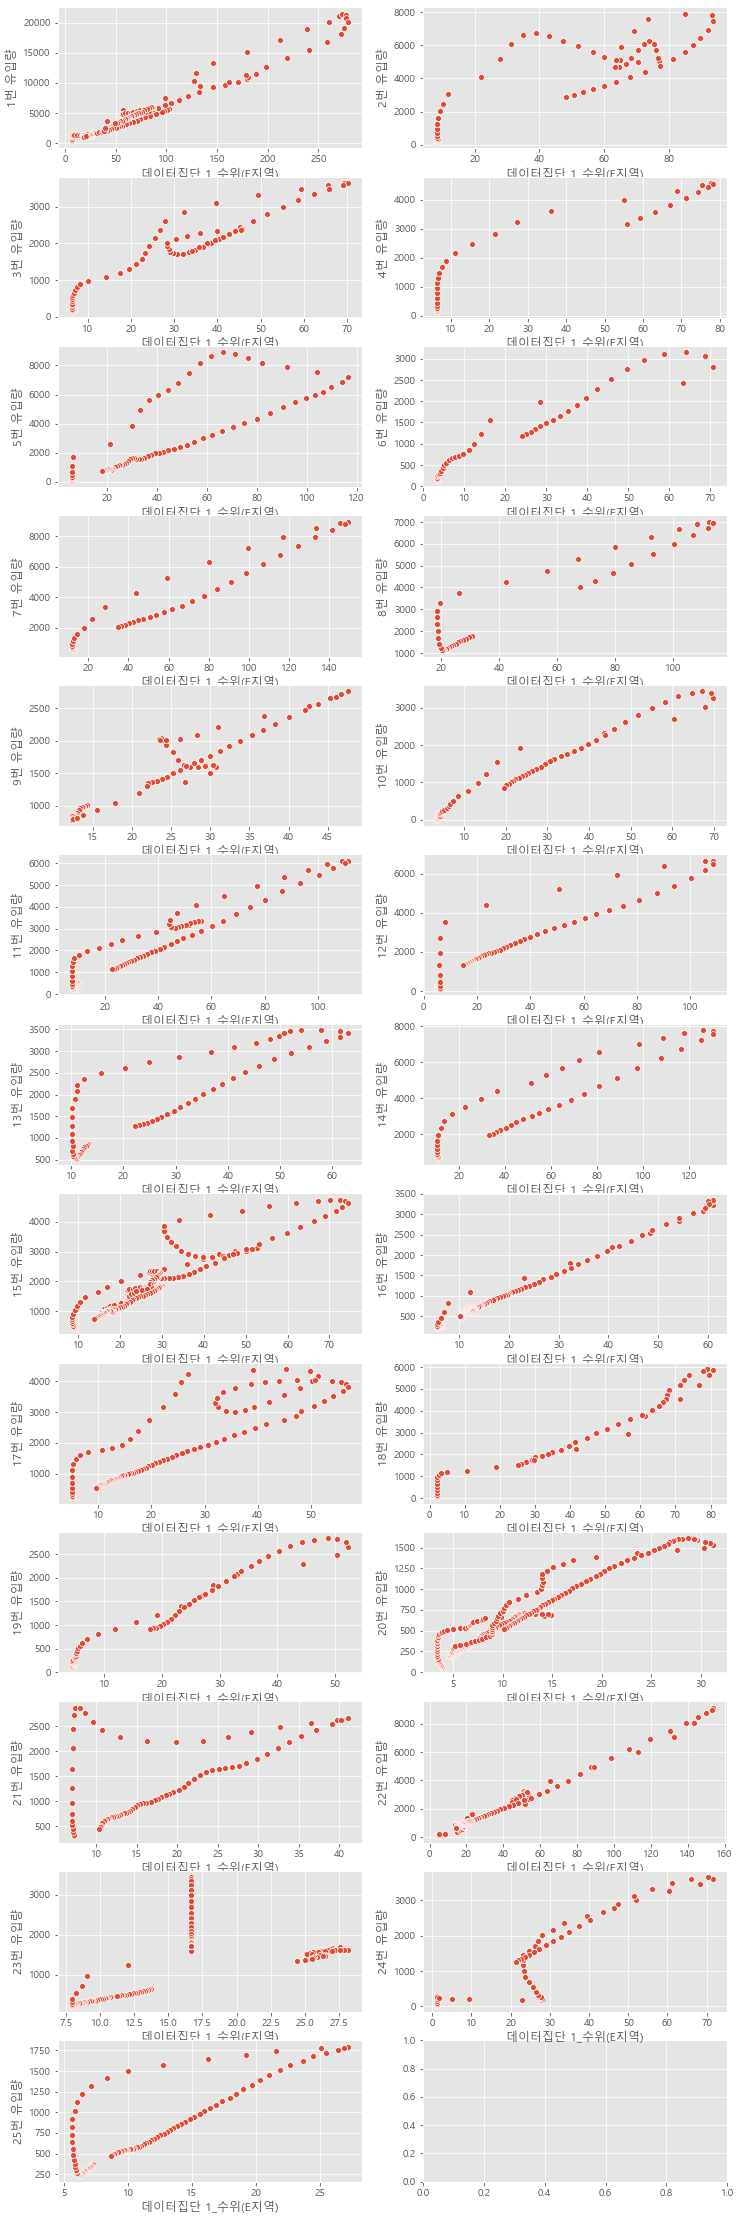

In [32]:
sq_x = df["데이터집단 1_수위(E지역)"] ** 2
fig,ax = plt.subplots(13,2,figsize=(12,40))
for i in df.홍수사상번호.unique():
    plt.subplot(13,2,i)
    sns.scatterplot(sq_x[cnts[i-1]:cnts[i]], df['유입량'][cnts[i-1]:cnts[i]])
    plt.ylabel(str(i)+"번 유입량")

### Y' = log(Y) && X' = X^2 && X'' = log(X') (shifted(-1))
#### 제일 고르게 퍼지고 선형을 가지나, 초반에 급상승하는 부분에 주의가 필요

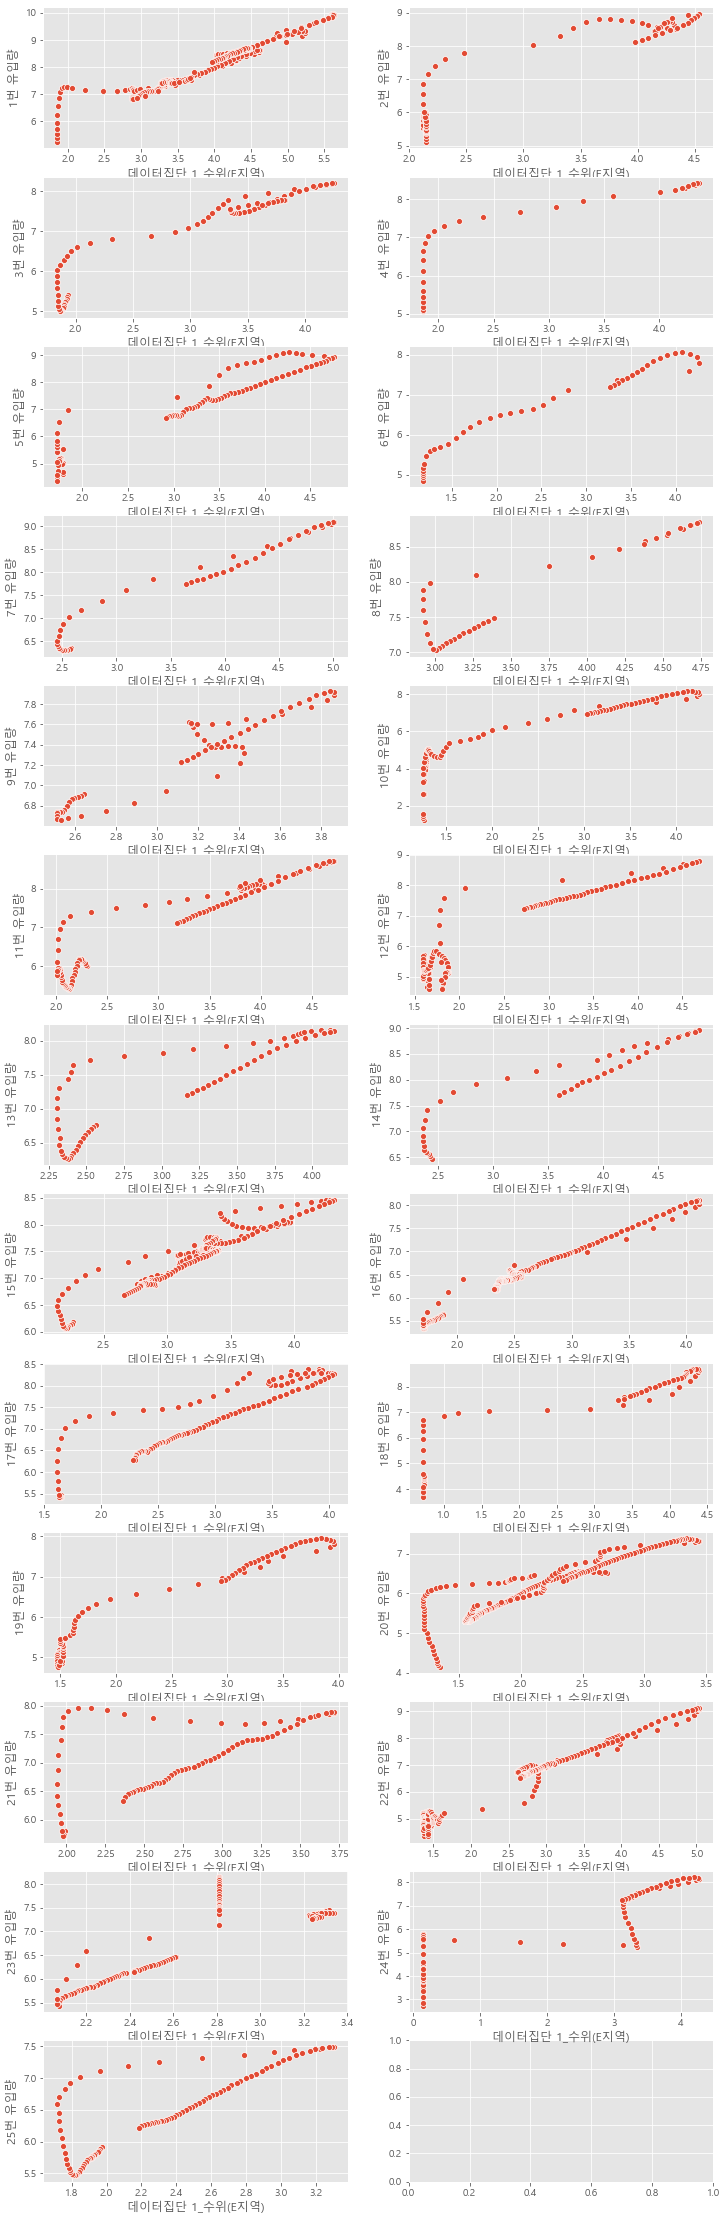

In [33]:
sq_x = shifted["데이터집단 1_수위(E지역)"] ** 2
log_y = np.log(shifted['유입량'])
log_sq_x = np.log(sq_x)
fig,ax = plt.subplots(13,2,figsize=(12,40))
for i in df.홍수사상번호.unique():
    plt.subplot(13,2,i)
    sns.scatterplot(log_sq_x[cnts[i-1]:cnts[i]], log_y[cnts[i-1]:cnts[i]])
    plt.ylabel(str(i)+"번 유입량")

### Y' = log(Y) && X' = X^2 && X'' = log(X')

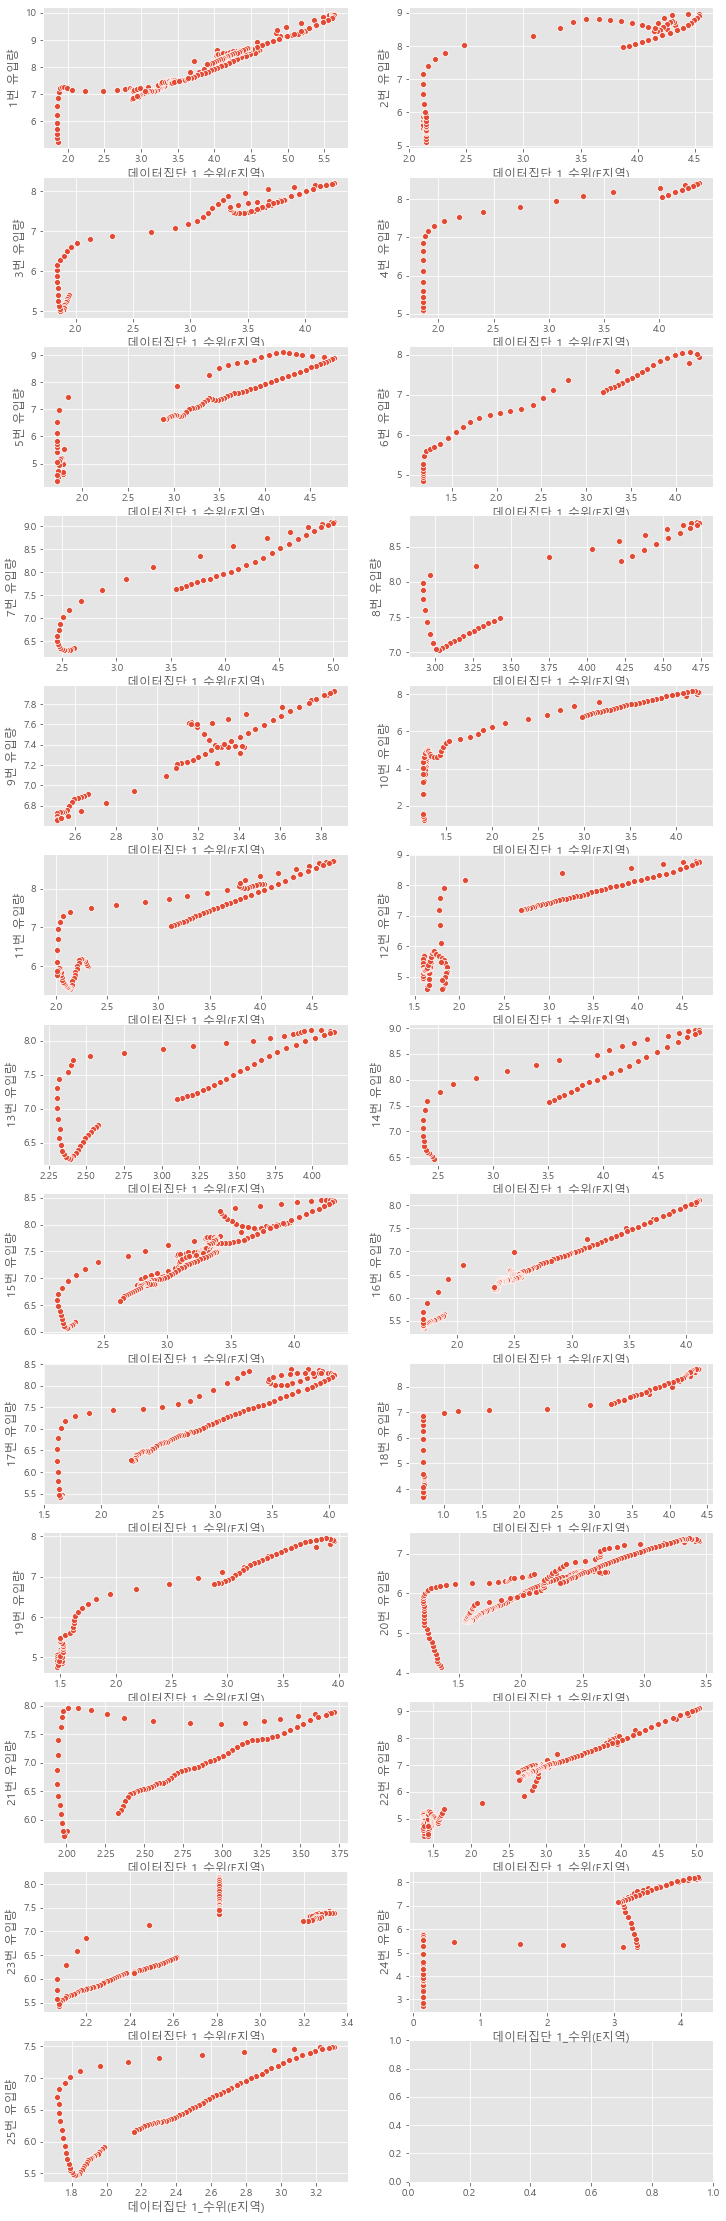

In [34]:
sq_x = df["데이터집단 1_수위(E지역)"] ** 2
log_y = np.log(df['유입량'])
log_sq_x = np.log(sq_x)
fig,ax = plt.subplots(13,2,figsize=(12,40))
for i in df.홍수사상번호.unique():
    plt.subplot(13,2,i)
    sns.scatterplot(log_sq_x[cnts[i-1]:cnts[i]], log_y[cnts[i-1]:cnts[i]])
    plt.ylabel(str(i)+"번 유입량")

### Y' = sqrt(Y) && X' = X^2
#### 이 변환도 선형을 많이 띄고 많이 퍼지지 않음

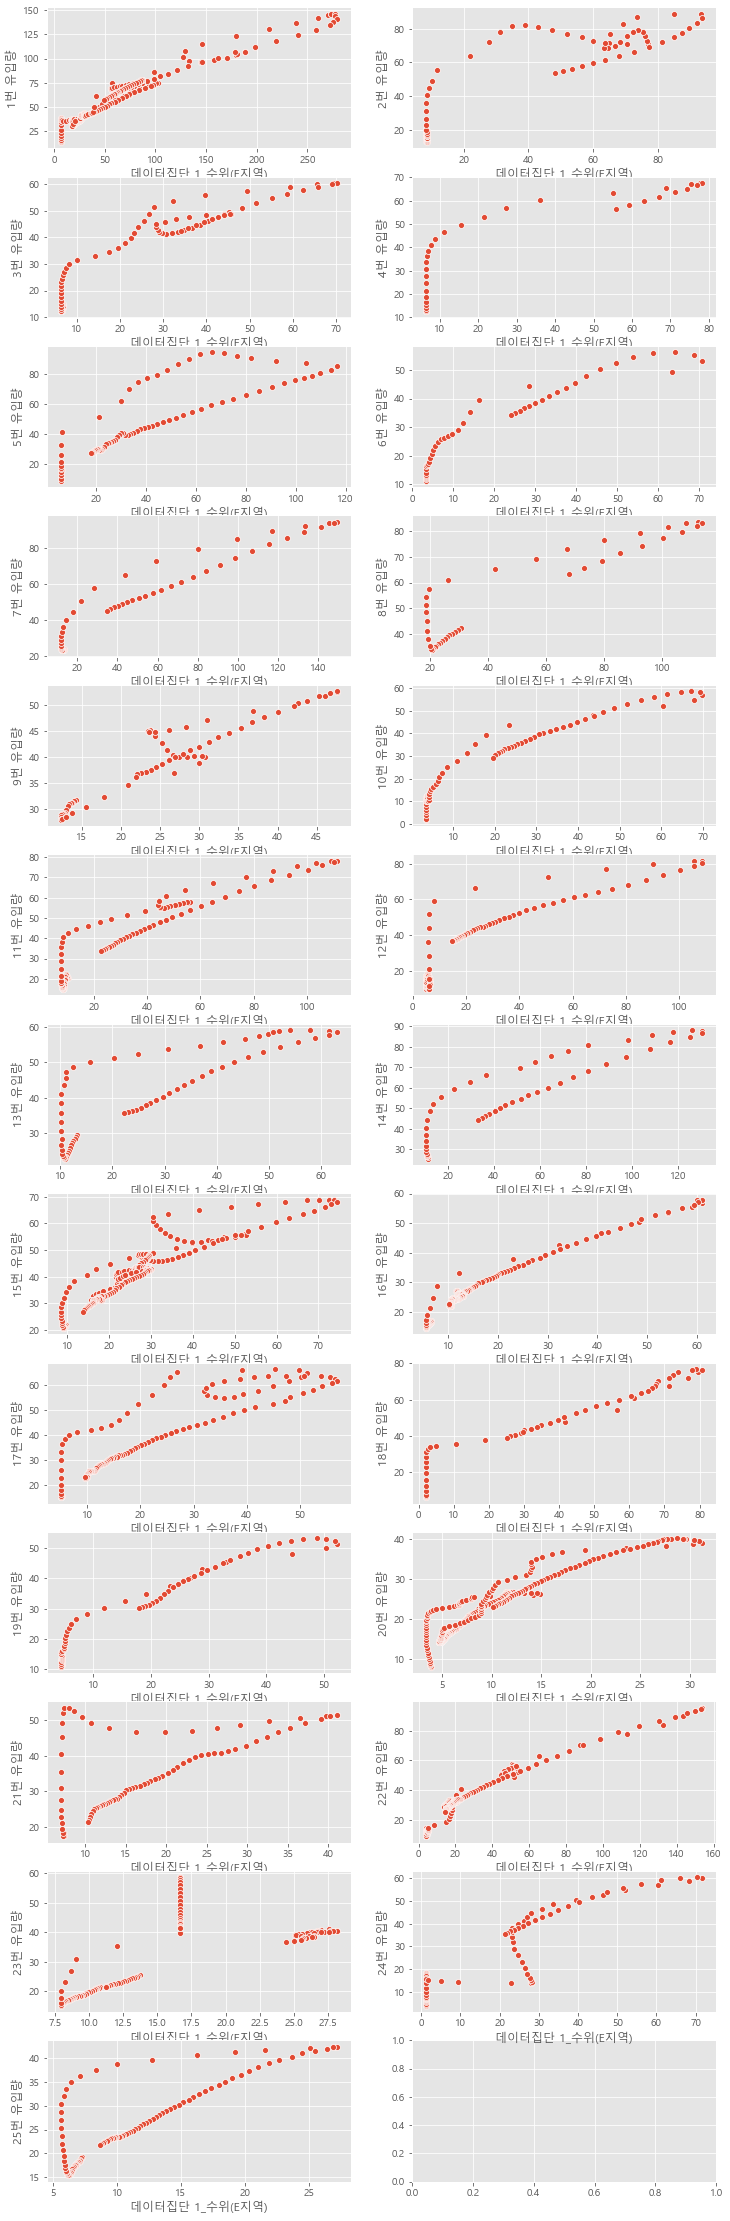

In [35]:
sq_x = df["데이터집단 1_수위(E지역)"] ** 2
sqrt_y = np.sqrt(df['유입량'])
fig,ax = plt.subplots(13,2,figsize=(12,40))
for i in df.홍수사상번호.unique():
    plt.subplot(13,2,i)
    sns.scatterplot(sq_x[cnts[i-1]:cnts[i]], sqrt_y[cnts[i-1]:cnts[i]])
    plt.ylabel(str(i)+"번 유입량")

<hr>